In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.print_figure_kwargs={'bbox_inches':None}
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = 20,10
mpl.rcParams.update({'font.size': 22})
mpl.rcParams['font.weight'] = 'light'

### Raw signals extracted from file kvordun-D20170101-T143048.raw (CW, 38 kHz) sent by Pall, using LSSS

Screen shot from LSSS
![LSSS screen shot](http://github.com/arminpo/python_scratch/raw/master/cw-target_detection-LSSS_screenshot.png)

### Input data

p_reim: sent pulse with alternating real and imaginary components <br>
s_re: real component of a ping, averaged over all sectors <br>
s_im: imaginary component of a ping, averaged over all sectors

In [6]:
p_reim = np.array([-5.551115123125783E-17, 0.0, -3.195879379344069E-4, 1.69178720069052E-4, -0.0064017462984855, 0.004564168024447923, -0.037024588128420965, 0.035895315275798645, -0.10936600658944787, 0.1439118515472726, -0.19667063584748604, 0.36100367075194745, -0.23044438987674698, 0.6354836949966696, -0.17127992585962265, 0.858278437530531, -0.04473057182666092, 0.9693228203684077, 0.10416838873072849, 0.9911953077370979, 0.2527244482990979, 0.9674828254351449, 0.3952168388350924, 0.9186031036516298, 0.5287238917453163, 0.848804461562601, 0.6502307572821613, 0.7597409200787524, 0.7569796535932116, 0.6534339108066922, 0.8465477532298995, 0.5322962319011568, 0.9169021728761908, 0.3990772859663, 0.9664461127061613, 0.25680067821055075, 0.9940550981680514, 0.10869559115918155, 0.9991003817745514, -0.04187682717463266, 0.980324312720599, -0.19127078444090298, 0.9270060206625049, -0.33156661012636834, 0.8091848159143396, -0.4361053137821042, 0.6043820187901453, -0.4548484036543743, 0.3529313505474374, -0.36050404879689424, 0.14653078626839247, -0.20357197116598671, 0.03846431540385681, -0.0751797405836431, 0.005231707661013996, -0.015703826114854824, 2.2189962556673493E-4, -0.0013114122096749559, 5.267744249137785E-7, -6.456211839367398E-6])
s_re = np.array([-84.12413787841797, -154.4994888305664, -211.74995803833008, -235.49969482421875, -231.24886322021484, -212.49766159057617, -187.49496841430664, -157.74297332763672, -124.49852561950684, -88.12429428100586, -49.68739318847656, -10.021498918533325, 29.726648330688477, 68.50048637390137, 105.25061798095703, 139.00142288208008, 167.75150299072266, 186.00135803222656, 178.50080108642578, 1.8614208698272705, 0.9033602923154831, 0.3770311325788498, 0.2536517586559057, 0.20331295114010572, 0.05859183147549629, -0.10058322548866272, -0.14364668726921082, -0.023767856881022453, 0.19625318609178066, 0.3735249061137438, 0.40444624423980713, 0.2976052761077881, 0.13353818655014038, -0.010361738881329075, -0.10025631822645664, -0.14514155592769384, -0.16443365113809705, -0.1663492303341627, -0.15744490595534444, -0.14835369866341352, -0.1420140229165554, -0.12758924206718802, -0.09347316918137949, -0.04450469883158803, -0.0027006794698536396, 0.014726568711921573, 0.010956992744468153, 0.0011957734823226929, -0.003297389150247909, -0.0021762470714747906, -6.105436477810144E-5, -2.936963574029505E-4, -0.002292329620104283, -0.004344824752479326, -0.005445755668915808, -0.005533492774702609, -0.004983152262866497, -0.004103278566617519, -0.0031458513403777033, -0.0017282386834267527, -0.0012517908762674779, -1.8249279128212947E-4, 3.3777827047742903E-4, 5.330354324541986E-4, 0.0011855358607135713, 0.001657257293118164, 0.0015349473687820137, 0.0013902466780564282, 0.0010284336894983426, 6.458247225964442E-4, 1.9320796855026856E-4, -1.6142658114404185E-4, -4.1565993888070807E-4, -5.605863480013795E-4, -8.480813849018887E-4, -9.966336583602242E-4, -0.001017370232148096, -9.688202117104083E-4, -9.202757282764651E-4, -8.183344980352558E-4, -6.461528682848439E-4, -3.983066708315164E-4, -1.4939382708689664E-4, 4.6539104005205445E-5, 1.7957451564143412E-4, 2.6670671650208533E-4, 3.3473500943159706E-4, 3.9684463990852237E-4, 4.4169818102091085E-4, 4.222215720801614E-4, 3.1320906782639213E-4, 1.368050321843839E-4, -6.216108340595383E-5, -2.405074774287641E-4, -3.6252334029995836E-4, -4.118556616958813E-4, -4.0582626752438955E-4, -3.810038324445486E-4, -3.609763916756492E-4, -3.4169081118307076E-4, -3.0803291815573175E-4, -2.5963499683712143E-4, -2.104334234900307E-4, -1.739449035085272E-4, -1.5210956030387024E-4, -1.3732237084695953E-4, -1.1904677720053769E-4, -9.374888759339228E-5, -7.349137240453274E-5, -8.062940628406068E-5, -1.208322119055083E-4, -1.6996726844809018E-4, -1.973858343262691E-4, -1.966705640370492E-4, -1.780736492946744E-4, -1.5070484096213477E-4, -1.2088925745956658E-4, -9.769293410499813E-5, -8.446046558674425E-5, -7.579109478683677E-5, -6.199796752071052E-5, -4.0591931792732794E-5, -2.0281634846242014E-5, -1.3905098512623226E-5, -2.553697686380474E-5, -4.874984188063536E-5, -7.312201705644839E-5, -9.012278496811632E-5, -9.810990468395175E-5, -1.0138817924598698E-4, -1.0153437870030757E-4, -9.283196322940057E-5, -7.39596862331382E-5, -5.124939957568131E-5, -2.9546256541834737E-5, -7.308515250770142E-6, 1.7672272406343836E-5, 4.190963772998657E-5, 5.853691686752427E-5, 6.360328870869125E-5, 5.997254402245744E-5, 5.15292699674319E-5, 4.023585080403791E-5, 2.6866166308536776E-5, 1.3064483027847018E-5, 1.345163809673977E-6, -9.407698598806746E-6, -2.11402202694444E-5, -3.526675209286623E-5, -4.772759029947338E-5, -5.315497719493578E-5, -5.04890799675195E-5, -4.496891256167146E-5, -4.0884783629735466E-5, -3.4588901144161355E-5, -2.0440809748834E-5, 1.694548018349451E-6, 2.350393651795457E-5, 3.7186723602644634E-5, 4.261087451595813E-5, 4.445871036296012E-5, 4.5591242269438226E-5, 4.6183725316950586E-5, 4.497986856222269E-5, 4.2010262859548675E-5, 3.870915170978151E-5, 3.465231361587939E-5, 2.8325157018116442E-5, 1.999050164158689E-5, 1.2369230262265773E-5, 6.437491663291439E-6, 7.004695135037764E-7, -4.96649465731025E-6, -8.127713272187975E-6, -8.018263997655595E-6, -6.87098213347781E-6, -7.84794633545971E-6, -1.1751993270081584E-5, -1.6328280366906256E-5, -1.792841271708312E-5, -1.4253623703552876E-5, -6.333032160910079E-6, 1.7690617823973298E-6, 6.469510026363423E-6, 8.136171430805916E-6, 9.823870755099051E-6, 1.213979686554012E-5, 1.2233341408318665E-5, 6.67406857246533E-6, -5.210279596212786E-6, -2.0958317350050493E-5, -3.5065366773778806E-5, -4.2049271087307716E-5, -4.177038340458239E-5, -3.686307221073548E-5, -3.0294092766780523E-5, -2.238139336441236E-5, -1.2911798355830229E-5, -2.3527495613961946E-6, 8.357902913758153E-6, 1.7908530992372107E-5, 2.5457478386670118E-5, 3.095933061558753E-5, 3.5427969123702496E-5, 3.918313996109646E-5, 4.1686560507514514E-5, 4.234219159116037E-5, 4.0256061765830964E-5, 3.275593007856514E-5, 1.8888612999035104E-5, 3.165715042996453E-6, -8.126912462103064E-6, -1.2456386230041971E-5, -1.1365590125933522E-5, -6.416135192921502E-6, 1.211617018270772E-6, 9.32115830210023E-6, 1.524014021470066E-5, 1.6216136032198847E-5, 1.2351395071164006E-5, 8.649473784316797E-6, 1.0318459317204542E-5, 1.72243626366253E-5, 2.527771266613854E-5, 3.162884900120844E-5, 3.703547389477535E-5, 4.292032770081278E-5, 4.838224322156748E-5, 5.213738768361509E-5, 5.4140715747053036E-5, 5.4955091854935745E-5, 5.522333185581374E-5, 5.5104089369706344E-5, 5.465695357997902E-5, 5.369978225644445E-5, 5.154089376446791E-5, 4.6822311105643166E-5, 3.6881545838696184E-5, 2.280760224948608E-5, 1.0700540258312685E-5, 5.937174023529224E-6, 6.71441910071735E-6, 7.665143812118913E-6, 6.231384531929507E-6, 2.944572862872974E-6, -1.0385863049577893E-6, -4.786749059348949E-6, -7.148764325393131E-6, -7.402490140862028E-6, -6.222726060656214E-6, -4.989441125147209E-6, -4.294133866267202E-6, -3.692243353725644E-6, -2.8362311468299595E-6, -1.7181647318231796E-6, -8.506637527716521E-8, 2.5620911836554683E-6, 6.159446968467819E-6, 1.0116000566995353E-5, 1.3491139156940335E-5, 1.5609932233928703E-5, 1.6191064446502423E-5, 1.5700474023105926E-5, 1.420290413989278E-5, 1.172372572000313E-5, 8.735297910789086E-6, 6.449742500080902E-6, 5.378831463787037E-6, 4.949993012814957E-6, 4.4630119191424455E-6, 3.978137179672103E-6, 3.7740230709459865E-6, 3.6034491586178774E-6, 3.1638212476536864E-6, 2.5608583200664725E-6, 2.177808198666753E-6, 2.0825569606586214E-6, 2.0044921598127985E-6, 1.4938601680114516E-6, 4.603637080435874E-7, -6.881751914988854E-7, -1.2741999455556652E-6, -1.015999984588234E-6, -2.3247494596034812E-7, 3.934741812372522E-7, 2.980737008329015E-7, -5.849349236086709E-7, -1.784036612662021E-6, -2.812231969073764E-6, -3.5700214766620775E-6, -4.0902681295307275E-6, -3.9469179000661825E-6, -2.6732646745131206E-6, -3.2634909175044413E-7, 2.4437877712557565E-6, 5.083157908813973E-6, 7.393103913955201E-6, 9.158387229035725E-6, 1.0143485610569769E-5, 1.0331970088373055E-5, 1.0182978257944342E-5, 1.003396687337954E-5, 9.834858587964845E-6, 9.200919379281913E-6, 7.892398343756213E-6, 6.091469117563975E-6, 3.990908680862049E-6, 1.8078831089951564E-6, 1.465535888200975E-7, -6.733446582529723E-7, -1.096464671945796E-6, -1.4452774053097528E-6, -1.4316868828245788E-6, -4.2445309134109266E-7, 1.6041754733464586E-6, 4.34225350431916E-6, 7.587458426883131E-6, 1.1096753098627232E-5, 1.4203315686245332E-5, 1.6192660154956684E-5, 1.6667893191879557E-5, 1.5069506503095909E-5, 1.1549867636517774E-5, 7.2730831561784726E-6, 3.6966421248507686E-6, 7.331676386002073E-7, -2.541718913562363E-6, -5.903034661969286E-6, -8.71938073032652E-6, -1.1252675449213712E-5, -1.4012734027346596E-5, -1.5977537941580522E-5, -1.5946656787946267E-5, -1.4109497982417452E-5, -1.102386221418783E-5, -6.483448999006214E-6, -7.822103498256183E-8, 7.427403829751711E-6, 1.464326362565771E-5, 2.044055872829631E-5, 2.4285026029247092E-5, 2.5864513190754224E-5, 2.5447295229241718E-5, 2.377838018219336E-5, 2.1125943021615967E-5, 1.7352676195514505E-5, 1.2943633123541076E-5, 8.70340136316372E-6, 4.931962280352309E-6, 1.92097428453053E-6, 2.9433022064040415E-7, -7.976973392942455E-8, -2.309076307938085E-7, -8.017162258511235E-7, -1.5994936086727307E-6, -2.180101802196077E-6, -2.574723566795001E-6, -2.9068894917827492E-6, -2.6760802143144247E-6, -1.059757096300018E-6, 2.0723015268231393E-6, 5.4091903862740764E-6, 7.242127253448416E-6, 6.687049904030573E-6, 4.28981070399459E-6, 1.6895002090677735E-6, 5.250535650702659E-8, -5.994702405587304E-7, -4.694641120295273E-7, 4.6769514483457897E-7, 2.0385266452649375E-6, 3.5388983405937324E-6, 4.282196016447415E-6, 4.5279147684595955E-6, 4.8626827009456974E-6, 5.434883206589802E-6, 5.8206101698488055E-6, 5.675887337019958E-6, 4.821186280423717E-6, 3.56477357854601E-6, 2.5662648113211617E-6, 2.171226697100792E-6, 1.5699987443440477E-6, 2.1879992573303753E-7, -1.362600670518077E-6, -2.5140252546407282E-6, -3.251608404752915E-6, -3.5546296430766233E-6, -2.6704299216362415E-6, -1.9036238541048078E-7, 3.025830807246166E-6, 6.090167360639498E-6, 8.758994567870104E-6, 1.1134370765830681E-5, 1.3223780797488871E-5, 1.497530649885448E-5, 1.5578992758946697E-5, 1.4033076126906963E-5, 1.045753720063658E-5, 6.443855909310514E-6, 3.37417714035837E-6, 1.4712093161506345E-6, 2.384597337368177E-7, -3.8503895893882145E-7, 5.188499301311822E-7, 9.291819992540695E-6, 4.469625673664268E-5, 1.2917038475279696E-4, 2.6072833134094253E-4, 4.233870713505894E-4, 6.560519686900079E-4, 0.005973164807073772, 0.015050963032990694, 0.027714679948985577, 0.03880674811080098, 0.04326233686879277, 0.04075984051451087, 0.03471023356541991, 0.02750094747170806, 0.01968956016935408, 0.011347805266268551, 0.002698705065995455, -0.005938672693446279, -0.014383617439307272, -0.022454368649050593, -0.02994946436956525, -0.036624688655138016, -0.04245363222435117, -0.04706185916438699, -0.04894581250846386, -0.04590222192928195, -0.03610597690567374, -0.022031324915587902, -0.009529881761409342, -0.0022302399447653443, -4.6063926220085705E-5, 2.6821667051990516E-4, 5.07423744238622E-4, 4.857257445110008E-4, 2.669846871867776E-4, 6.156373638077639E-5, -5.2046274504391477E-5, -1.33281760099635E-4, -1.927369085024111E-4, -1.728286406432744E-4, -8.941250189309358E-5, -3.7531545785896014E-5, -4.2945530822180444E-5, -3.698997102219437E-5, 9.2283594312903E-6, 4.158889942118549E-5, 3.0459790885117854E-5, 1.402438249442639E-5, 1.6659229345350468E-5, 1.3893877508053265E-5, -5.149006710780668E-6, -1.5993533679647953E-5, -9.706213177196332E-6, -6.049752528269892E-6, -1.1237720400458784E-5, -1.0967993034682877E-5, -3.2086459214042407E-6, 3.3528544918226544E-7, -6.333389137580525E-7, 2.0318656197559903E-6, 5.383655775403895E-6, 2.5887602532748133E-6, -1.8678441620068043E-6, -2.3320999247289365E-6, -3.534735128596367E-6, -9.034579704803036E-6, -1.2507445717346855E-5, -1.1286149906197807E-5, -1.224512459430116E-5, -1.6677296002853836E-5, -1.6347516975656617E-5, -1.1576190900086658E-5, -1.5814442122064065E-5, -3.490570770736667E-5, -5.213858958086348E-5, -3.996590658061905E-5, 1.2647013932109985E-5, 1.0460705289006E-4, 2.867218245228287E-4, 0.003144141170196235, 0.008732636459171772, 0.0152188572101295, 0.02082240767776966, 0.024930596817284822, 0.028454313054680824, 0.031147010624408722, 0.031208090018481016, 0.028233702294528484, 0.023465843871235847, 0.01856419281102717, 0.014513514935970306, 0.011519223917275667, 0.009135301574133337, 0.006722623016685247, 0.004033987934235483, 0.0011536555794009473, -0.0015869593535171589, -0.0032490659650648013, -0.002286511444253847, 0.0016909422120079398, 0.006279196648392826, 0.008440981269814074, 0.008305427967570722, 0.008335980237461627, 0.009045540122315288, 0.00874037598259747, 0.0066921585239470005, 0.00373221084009856, 2.26164892410452E-4, -7.081438452587463E-4, -9.275830816477537E-4, -5.860752426087856E-4, -1.5161642113525886E-4, 8.20363602542784E-5, 1.0334792023058981E-4, 3.219338395865634E-6, -1.2356882871245034E-4, -1.8789237310556928E-4, -1.496150161983678E-4, -5.062711625214433E-5, 2.3744932605040958E-5, 2.610212220588437E-5, -1.7009084103847272E-5, -4.3917347966271336E-5, -2.6526800638748682E-5, 6.581239176739473E-6, 1.4276657793743652E-5, -5.07685456341278E-6, -2.1607123699141084E-5, -1.915665903595709E-5, -8.227693342632847E-6, -2.52873110184737E-6, -1.6941244211921003E-6, 1.8836547042155871E-6, 1.051439566346346E-5, 1.928411188600876E-5, 2.1587980427284492E-5, 1.5168093796091853E-5, 4.845501905492711E-6, -1.6181589899133542E-6, -2.2096728855558467E-6, -2.4611099433968775E-6, -6.14231119300257E-6, -9.445752198189439E-6, -7.852369492411526E-6, -3.691726746524182E-6, -2.6220468498650007E-6, -5.2834859332051565E-6, -7.0685359006006365E-6, -4.915258443816128E-6, -8.278116183646489E-7, 1.776995958380212E-6, 2.5194727442112708E-6, 3.3773157142036325E-6, 5.314706754688814E-6, 7.0718638767175435E-6, 7.086735621442131E-6, 5.413312862856401E-6, 3.5803458331429283E-6, 2.7924584742322622E-6, 2.694010902359878E-6, 1.8158866055273393E-6, -4.0775348253418997E-7, -3.0720382255822187E-6, -5.122022514569835E-6, -6.457292101913481E-6, -7.5939380224099295E-6, -8.658119185156465E-6, -9.499147722635826E-6, -9.698896064946894E-6, -9.150744745056727E-6, -8.361311529370141E-6, -7.681740953557892E-6, -6.818261311991591E-6, -5.4786646614957135E-6, -3.9608447366390465E-6, -2.6713490797192208E-6, -1.4313681617750262E-6, 1.1916239373022108E-7, 1.8453500700843506E-6, 3.397137216865076E-6, 4.666831728172838E-6, 5.444187451075777E-6, 5.342189709267586E-6, 4.486127131997364E-6, 3.7467902416210563E-6, 3.6278006838585952E-6, 3.5280947763283166E-6, 2.8174555808391233E-6, 1.777792832058367E-6, 1.2103174498179214E-6, 1.238757448618344E-6, 1.3520200639050017E-6, 1.2436956353667483E-6, 9.945803896016514E-7, 5.202692818784271E-7, -2.364355999873169E-7, -8.851112340835243E-7, -9.075854379148041E-7, -4.746336230709858E-7, -3.920273083934944E-7, -1.1543716880169086E-6, -2.570681040481304E-6, -4.096554398813623E-6, -6.006810679082264E-6, -1.1971068488492165E-5, -3.0131058338156436E-5, -6.485264748334885E-5, -1.044572609316674E-4, -1.2728804540529381E-4, -1.2454553643692634E-4, -1.0634948193910532E-4, -8.437169890385121E-5, -6.290926535257313E-5, -3.984680051871692E-5, -1.5146338455451769E-5, 1.0630258884702926E-5, 3.6132995774096344E-5, 6.0095493608969264E-5, 8.179189535439946E-5, 1.0146171189262532E-4, 1.1821034604508895E-4, 1.3299252714205068E-4, 1.4405416322915698E-4, 1.468833074795839E-4, 1.3130297065799823E-4, 9.392334868607577E-5, 4.8391726522822864E-5, 1.695024639047915E-5, 6.465540991484886E-6, 5.946122996647318E-6, 5.0595260745467385E-6, 2.7376107709642383E-6, 6.721603540427168E-7, -9.220876080462403E-7, -2.143283996502987E-6, -2.868686724610825E-6, -3.327904352090627E-6, -3.6486771648469585E-6, -3.779208356036179E-6, -3.7012031697258863E-6, -3.502877774508306E-6, -3.1330122567396756E-6, -2.3254108327819267E-6, -1.1464728544297031E-6, -1.6646389155994257E-7, 8.439365117851594E-8, -2.441127548991062E-7, -5.659410362568451E-7, -5.11136704517412E-7, -2.5849601570371306E-7, -2.321728800325218E-7, -5.968157665847684E-7, -9.30994019654463E-7, -6.677798296550463E-7, 1.9534678585841903E-7, 1.196013954540831E-6, 1.993761713947606E-6, 2.6690852621413796E-6, 3.394024759018066E-6, 4.079490111053019E-6, 4.512859618444054E-6, 4.565375661513826E-6, 4.274102991530526E-6, 3.82813095001211E-6, 3.4754008311210782E-6, 3.209411090665526E-6, 2.8939847425135667E-6, 2.6566809196992835E-6, 2.717925724482484E-6, 2.939332190976529E-6, 2.9625129158716845E-6, 2.7902722337103114E-6, 2.8340483169131403E-6, 3.4600543870055844E-6, 4.497712325246539E-6, 4.789816784978029E-6, 3.145792561554117E-6, -9.020823199534789E-9, -2.989924951180001E-6, -4.713613861895283E-6, -6.1008323370970174E-6, -8.080382940534037E-6, -1.0542889754106E-5, -1.296623447899492E-5, -1.4763265426154248E-5, -1.5748426505979296E-5, -1.6033169941920278E-5, -1.4952095284570532E-5, -1.0932521945505869E-5, -2.7507073809829308E-6, 6.33368131275347E-6, 1.0491056400496745E-5, 8.002391041372903E-6, 2.1909646221729417E-6, -3.8499317724927096E-6, -1.081657885038112E-5, -1.8842960344045423E-5, -2.7509227948030457E-5, -4.3071007894468494E-5, -8.038706118895789E-5, -1.485421453253366E-4, -2.304606605321169E-4, -2.912997661042027E-4, -3.098966844845563E-4, -2.961338286695536E-4, -2.687808628252242E-4, -2.3478513867303263E-4, -1.910247574414825E-4, -1.3803275305690477E-4, -8.018293078748684E-5, -2.5057928723981604E-5, 2.289381563969073E-5, 6.6877345489047E-5, 1.0977346391882747E-4, 1.4945414477551822E-4, 1.855520954450185E-4, 2.1487116464413702E-4, 2.2893809727975167E-4, 2.1179827672312967E-4, 1.5849642477405723E-4, 8.939352483139373E-5, 3.8699424749211175E-5, 1.8321337847737595E-5, 1.5145427369134268E-5, 1.476269005706854E-5, 1.1109366369055351E-5, 3.341770025144797E-7, -1.7342446512191856E-5, -3.609231771406485E-5, -5.0372623263683636E-5, -6.17471832811134E-5, -7.217838651740749E-5, -8.154211082000984E-5, -8.94696349860169E-5, -9.535398021398578E-5, -9.927156861522235E-5, -1.010360904274421E-4, -1.0034860861196648E-4, -9.664658318797592E-5, -9.168614087684546E-5, -8.519558832631446E-5, -7.693698353250511E-5, -6.394295087375212E-5, -4.529289071797393E-5, -2.535000203351956E-5, -1.2116384539240244E-5, -7.453914122379501E-6, -5.847801730851643E-6, -3.016534265043447E-6, 1.7889851733343676E-7, 2.516665517759975E-6, 4.2983015191566665E-6, 7.555035608675098E-6, 1.7137834902314353E-5, 3.8991529777376854E-5, 7.32076423446415E-5, 1.1175772237947967E-4, 1.4549282229836535E-4, 1.5946697885738104E-4, 1.3304613457876258E-4, 5.882723053218797E-5, -3.6903076761518605E-5, -1.1980398085142951E-4, -1.8180893175667734E-4, -2.3209732717077713E-4, -2.7866463278769515E-4, -3.3016380621120334E-4, -3.9464487781515345E-4, -4.833379134652205E-4, -5.909743122174405E-4, -6.941887695575133E-4, -7.64761702157557E-4, -7.82881717896089E-4, -7.473362638847902E-4, -6.716483403579332E-4, -5.753256918978877E-4, -4.6066686445556115E-4, -3.3750270085874945E-4, -2.2790627190261148E-4, -1.555782655486837E-4, -1.1908986107300734E-4, -1.2078535473847296E-4, -1.6507231794093968E-4, -2.2518556943396106E-4, -2.508424713596469E-4, -2.235535289401014E-4, -1.6417870466511886E-4, -9.26703203276702E-5, -2.0158069673925638E-5, 4.025294219900388E-5, 8.218219409172889E-5, 1.1414510913709819E-4, 1.426147446181858E-4, 1.6146346388268284E-4, 1.6390726432291558E-4, 1.55520095177053E-4, 1.542846253528296E-4, 1.6881211740837898E-4, 1.9101837187918136E-4, 1.9589844028189418E-4, 1.4780157107452396E-4, 3.0388097457034746E-5, -1.2551594591059256E-4, -2.649512880452676E-4, -3.572780915419571E-4, -3.9273736911127344E-4, -3.656876797322184E-4, -2.960683996207081E-4, -2.2562671802006662E-4, -1.810212415875867E-4, -1.5745050404802896E-4, -1.3763512106379494E-4, -1.1683087605973697E-4, -9.526343183097197E-5, -7.775923404551577E-5, -7.018934411462396E-5, -8.186686886801908E-5, -1.0737926095316652E-4, -1.3062197649560403E-4, -1.4415684154300834E-4, -1.6225187027885113E-4, -2.018500199483242E-4, -2.5328361152787693E-4, -2.889812967623584E-4, -2.9320723115233704E-4, -2.79033189144684E-4, -2.742646865954157E-4, -2.957226424769033E-4, -3.2890564398257993E-4, -3.354087421030272E-4, -2.9559221729869023E-4, -2.2000303033564705E-4, -1.3168480563763296E-4, -4.381317376100924E-5, 3.457731418166077E-5, 9.300120245825383E-5, 1.328660400758963E-4, 1.6853669148986228E-4, 2.0912199761369266E-4, 2.458925482642371E-4, 2.6525829889578745E-4, 2.70026721409522E-4, 2.7164210405317135E-4, 2.756952599156648E-4, 2.7092678647022694E-4, 2.3582514768349938E-4, 1.6162274368980434E-4, 7.030692253806592E-5, 1.0686278528737603E-7, -3.4938117096317E-5, -4.903153148916317E-5, -5.802848409075523E-5, -6.5008826823032E-5, -6.901345471987952E-5, -7.160960376495495E-5, -7.43728478482808E-5, -7.508811904699542E-5, -6.784822380723199E-5, -4.9091096116171684E-5, -2.4924362151068635E-5, -5.091571665616357E-6, 8.225676992879016E-6, 2.000100812438177E-5, 3.2776173611637205E-5, 4.5657292389478243E-5, 5.666559809469618E-5, 6.706815656798426E-5, 7.822092993592378E-5, 8.845317552186316E-5, 9.363881235913141E-5, 9.218166906066472E-5, 8.688981688464992E-5, 8.021407302294392E-5, 7.103487769200001E-5, 5.549800607695943E-5, 3.328037291794317E-5, 9.424195354768017E-6, -8.070303465501638E-6, -1.674039140198147E-5, -2.0679123736044858E-5, -2.4136261345120147E-5, -2.7540299925021827E-5, -2.9808544923071167E-5, -3.125972511952568E-5, -3.231175105611328E-5, -3.2065933737612795E-5, -2.8519426450657193E-5, -2.3068568566486647E-5, -1.9923213358197245E-5, -2.1900865704083117E-5, -2.8419203772500623E-5, -3.796074088313617E-5, -4.9269104238192085E-5, -5.9683388826670125E-5, -6.818558631493943E-5, -7.668913804081967E-5, -8.518307686244952E-5, -9.012529881147202E-5, -8.657552734803176E-5, -7.294237377664103E-5, -5.187114265936543E-5, -2.8459937311708927E-5, -6.838513854745543E-6, 1.1920448741875589E-5, 2.7755601877288427E-5, 3.940513852285221E-5, 4.818358866032213E-5, 5.790899535895733E-5, 7.085633387760026E-5, 8.445960975222988E-5, 9.440061785426224E-5, 9.96128346741898E-5, 1.0163938713958487E-4, 9.63467029464482E-5, 7.468826424883446E-5, 3.347782239870867E-5, -1.3587763191935665E-5, -4.105118387087714E-5, -3.176301925122971E-5, 7.837615839889622E-6, 5.47701092727948E-5, 9.517012586002238E-5, 1.3599388330476359E-4, 1.8558568626758642E-4, 2.3141628116718493E-4, 2.647456485647126E-4, 2.8976943849556847E-4, 3.088515077251941E-4, 3.069819722441025E-4, 2.7956338817602955E-4, 2.3820929345674813E-4, 1.986312163353432E-4, 1.5876118413871154E-4, 1.0046987722489575E-4, 1.3154250609659357E-5, -8.701067417860031E-5, -1.7065737119992264E-4, -2.227277045676601E-4, -2.501147619113908E-4, -2.6845663160202093E-4, -2.811144440784119E-4, -2.7992233299301006E-4, -2.5727216416271403E-4, -2.1583088528132066E-4, -1.5931257371448737E-4, -9.501960084890015E-5, -5.186854446037614E-5, -5.6772749758238206E-5, -1.0107763228006661E-4, -1.5410016112582525E-4, -1.9916457199542492E-4, -2.364054535064497E-4, -2.7835114269691985E-4, -3.3295909452135675E-4, -3.920877061318606E-4, -4.42329139332287E-4, -4.780924864462577E-4, -5.009810120100155E-4, -5.080033224658109E-4, -4.997241849196143E-4, -4.813656196347438E-4, -4.446485581866E-4, -3.825724907073891E-4, -2.904883576775319E-4, -1.9100228064417024E-4, -1.2192272833999596E-4, -9.494294295109285E-5, -8.898686201064265E-5, -7.984401418070775E-5, -6.154854963824619E-5, -3.994155576947378E-5, -2.1901083982811542E-5, -7.380162514891708E-6, 1.2061782769023921E-5, 3.6997090091972495E-5, 5.193818469706457E-5, 4.3557543449423974E-5, 1.7249839459054783E-5, -1.1354185119216709E-5, -3.518493258525268E-5, -5.954876087344019E-5, -9.148068420472555E-5, -1.299598998230067E-4, -1.632133321436413E-4, -1.8053443454846274E-4, -1.8357433236815268E-4, -1.8045817159872968E-4, -1.7449755432608072E-4, -1.655566957197152E-4, -1.5939033255563118E-4, -1.559332540637115E-4, -1.454757984902244E-4, -1.1659216761472635E-4, -7.547658879047958E-5, -4.043022499899962E-5, -2.344265840292792E-5, -1.8265283870277926E-5, -1.3394286725088023E-5, -6.488404324045405E-6, -3.925504188373452E-6, -1.0746313819254283E-5, -2.3853182938182727E-5, -3.434841482885531E-5, -3.677073755170568E-5, -3.437898915592541E-5, -3.1309263249568176E-5, -2.653434785315767E-5, -2.2452850544141256E-5, -3.0795482416579034E-5, -5.890259899388184E-5, -9.372835665999446E-5, -1.1212987192266155E-4, -1.0581169954093639E-4, -8.428415367234265E-5, -5.860250939804246E-5, -3.1623422728443984E-5, -3.589229436329333E-6, 2.4668473088240717E-5, 5.252529365407099E-5, 7.910511385489372E-5, 1.0383136304881191E-4, 1.2537559268821497E-4, 1.420187545591034E-4, 1.5170143160503358E-4, 1.559664469823474E-4, 1.5525119306403212E-4, 1.4774088413105346E-4, 1.255676161235897E-4, 8.736692325328477E-5, 4.6007544369786046E-5, 1.9145077658322407E-5, 9.603986882211757E-6, 8.08030489451994E-6, 7.631848262690255E-6, 8.186729999692943E-6, 1.0286027077199833E-5, 1.2607115991158935E-5, 1.3905398077440623E-5, 1.4160179176769816E-5, 1.3984160517566124E-5, 1.3889157514768158E-5, 1.3786868237275485E-5, 1.337800466671979E-5, 1.259562219502186E-5, 1.1672845900534412E-5, 9.374674277751183E-6, 1.8855562871067377E-6, -1.437368359802349E-5, -3.732241657417035E-5, -5.9952637457172386E-5, -7.755275692034047E-5, -9.01689843431086E-5, -9.917912757373415E-5, -1.0470578490640037E-4, -1.0768604806798976E-4, -1.0914960876107216E-4, -1.09387965494534E-4, -1.0748053318820894E-4, -1.024735738610616E-4, -9.472478268435225E-5, -8.516156594851054E-5, -7.421914278893382E-5, -6.136116326160845E-5, -4.493788003401278E-5, -2.5840450689429417E-5, -9.329846449190882E-6, -2.6292667598681874E-6, -5.34406345309435E-6, -1.0160600140807219E-5, -1.1767669661821856E-5, -1.0615751364184689E-5, -8.69879706044685E-6, -6.3776793979286595E-6, -3.5008068834940786E-6, -2.1503603875316912E-7, 3.034897417819593E-6, 5.823294999096618E-6, 8.047556633528075E-6, 9.883768939289439E-6, 1.1454842706370982E-5, 1.2475169341996661E-5, 1.273596933515364E-5, 1.2616758681360807E-5, 1.2378318501760077E-5, 1.1801329378613445E-5, 1.042288397457014E-5, 8.614206535639823E-6, 7.016372066459553E-6, 5.882976914506344E-6, 4.910135245950187E-6, 3.7215383557054338E-6, 2.1922047466205186E-6, 6.3763326352273E-7, -3.516039441819885E-7, -5.363332320484915E-7, -3.5590483093983494E-7, -9.301879799750168E-8, 4.032038987134001E-7, 1.3367898361593689E-6, 2.2353064844660153E-6, 2.3036598975068046E-6, 1.4036149877938442E-6, 3.7778787032038963E-7, -2.9164397119529895E-7, -7.867162139518769E-7, -1.4386636735252978E-6, -1.9325956088778184E-6, -1.905751899400343E-6, -1.5437894802516894E-6, -1.430791776613205E-6, -1.907748512053331E-6, -2.6266669692631694E-6, -2.819767772166415E-6, -2.091907774115498E-6, -6.549292379531835E-7, 1.2063528345152008E-6, 3.4461408873198707E-6, 6.005995260238706E-6, 8.390225389121042E-6, 9.955612995327101E-6, 1.0436232855681737E-5, 1.0223076060356107E-5, 9.734539531791597E-6, 8.805006608270105E-6, 7.161747873851709E-6, 5.1703989640827785E-6, 3.4304285918551614E-6, 2.1062713813080336E-6, 1.0132266652362887E-6, 3.7017571230535395E-9, -9.209617815031379E-7, -1.775927842118108E-6, -2.4597993615316227E-6, -2.9674560408921025E-6, -3.340089804737545E-6, -3.568375007034774E-6, -3.4732005218529594E-6, -3.0406846747155214E-6, -2.2896844029673957E-6, -1.3359194213080627E-6, -4.6245546059253684E-7, 1.5947756537570967E-7, 5.781000851357021E-7, 9.526038411422633E-7, 1.3660430795425782E-6, 1.8043392060462793E-6, 2.1876464302295062E-6, 2.355177727508817E-6, 2.0540944376534753E-6, 1.175705563127849E-6, 6.663331220124746E-8, -6.805488013128524E-7, -6.176706577321056E-7, 1.77231612497053E-7, 1.2094264292272783E-6, 2.014878305089951E-6, 2.616371268970852E-6, 3.5412490859698664E-6, 5.172224348370946E-6, 7.056209256006696E-6, 8.302088758682657E-6, 8.614953003416304E-6, 8.62236754528567E-6, 8.834355526232684E-6, 9.206891718349652E-6, 9.538864190972163E-6, 9.438969755137805E-6, 8.35856621961284E-6, 6.421354555641301E-6, 4.312789087634883E-6, 2.7800554107670905E-6, 2.073337327601621E-6, 1.807159229372246E-6, 1.3399739486885665E-6, 4.953474217472831E-7, -4.5086289901519194E-7, -1.1835826398964855E-6, -1.607066842268523E-6, -2.02233911750227E-6, -2.8337307682591018E-6, -3.95417929865971E-6, -4.430231911101146E-6, -3.367689430433529E-6, -8.314214454685498E-7, 1.9282743295434557E-6, 3.524007695432374E-6, 3.5804636269176626E-6, 2.792962849440528E-6, 1.885497141529413E-6, 1.2616710307611356E-6, 1.1819703900073364E-6, 1.4885484631577128E-6, 1.5675649933655222E-6, 1.1335566227899108E-6, 4.1210458112672654E-7, -4.579529786497005E-7, -1.6419156736446894E-6, -3.0565711597319023E-6, -4.1374459840426425E-6, -4.469722028943579E-6, -3.832800373970713E-6, -2.02442909369438E-6, 5.699487140020665E-7, 2.9471656137758373E-6, 4.415553860326327E-6, 5.3663303560824716E-6, 6.461016312186985E-6, 7.826057128568209E-6, 9.093437370211177E-6, 1.005045317015174E-5, 1.0452826927576098E-5, 9.826949735725066E-6, 8.089000800737267E-6, 5.597670934776033E-6, 2.8824494222590147E-6, 3.158563472993592E-7, -1.634568008057613E-6, -2.5394448552873428E-6, -2.731840424985421E-6, -3.115690844879282E-6, -4.1883011476784304E-6, -5.657630708810757E-6, -7.0153006390683E-6, -7.82535801135964E-6, -7.780666919643409E-6, -6.843970936643018E-6, -5.662440969445015E-6, -4.779583548497612E-6, -4.014492517967483E-6, -3.0326851714335135E-6, -2.017793946151869E-6, -1.5060904274832865E-6, -1.5998475362266618E-6, -1.847829061318862E-6, -1.5700408511065689E-6, -9.873426165540877E-8, 3.1433693550297903E-6, 8.164368011875922E-6, 1.423033256742201E-5, 2.0157566268608207E-5, 2.507817407604307E-5, 2.8589767680387013E-5, 3.103363724221708E-5, 3.2344979899789905E-5, 3.2560051295149606E-5, 3.1338011467596516E-5, 2.8917451345478185E-5, 2.5424077648494858E-5, 2.1576332756012562E-5, 1.73857747540751E-5, 1.2935465463215223E-5, 8.301320463033335E-6, 3.839635553504195E-6, -1.1822857004517573E-7, -3.1617659885796456E-6, -5.11264693159319E-6, -5.897519372410898E-6, -5.505284320861392E-6, -4.098867577795318E-6, -1.8655575342307884E-6, 9.343445981357945E-7, 3.98745416418933E-6, 6.878434550827706E-6, 9.272474130739283E-6, 1.097355448109738E-5, 1.1983130434600753E-5, 1.250413373554693E-5, 1.2682875478731148E-5, 1.253013056157215E-5, 1.230995405876456E-5, 1.2358719516214478E-5, 1.2825065141441883E-5, 1.3361680430534761E-5, 1.3773091268376447E-5, 1.3563976835939684E-5, 1.2261656365808449E-5, 9.734290188134764E-6, 6.415518328140024E-6, 2.979445270057113E-6, 5.459057561552072E-8, -1.8367126415341772E-6, -2.4950101646936673E-6, -2.3702009457338136E-6, -2.1960515823593596E-6, -2.4629616177662683E-6, -3.1329230978371925E-6, -4.125381209973966E-6, -5.257752889065159E-6, -6.136635221309916E-6, -6.418099076199724E-6, -6.282955837377813E-6, -5.914730877520924E-6, -5.177129423827864E-6, -3.716234914463712E-6, -8.341587971472109E-7, 4.2740922481243615E-6, 1.0816429039550712E-5, 1.6340548881998984E-5, 1.8424549352857866E-5, 1.4630051964559243E-5, 1.1090032785432413E-6, -2.4129618168444722E-5]) 
s_im = np.array([-7.390511512756348, 8.355408668518066, 42.37506103515625, 84.1254653930664, 123.25066757202148, 157.00153350830078, 187.00162506103516, 213.0016326904297, 234.50157165527344, 250.06433486938477, 260.6895942687988, 265.00181579589844, 263.5010986328125, 255.37512969970703, 241.24932098388672, 221.99830627441406, 196.49645233154297, 161.7393035888672, 115.12308120727539, -0.8428112864494324, -0.7265889942646027, -0.3061569780111313, 0.12774386256933212, 0.39976316690444946, 0.5094228610396385, 0.5145389288663864, 0.48030345141887665, 0.4569973945617676, 0.44820794463157654, 0.43062958121299744, 0.4031539410352707, 0.36701484210789204, 0.3153908848762512, 0.24349499307572842, 0.16498656757175922, 0.1139187733642757, 0.12084777187556028, 0.16049921792000532, 0.1695554107427597, 0.11806016601622105, 0.03941925521939993, -0.010436687618494034, -0.012550492770969868, 0.006837349385023117, 0.01686909142881632, 0.013223358197137713, 0.00834000576287508, 0.009473525744397193, 0.013703677766898181, 0.017673064721748233, 0.017959859687834978, 0.015386844985187054, 0.011420666240155697, 0.007117635570466518, 0.003221341175958514, 2.9621915018651634E-5, -0.0019635363714769483, -0.00219947611913085, -0.0010034495498985052, 4.913980228593573E-4, 0.0019329041242599487, 0.0023663758365728427, 0.0016117253617267124, 0.001485683722421527, 9.231588337570429E-4, 2.8521812055259943E-4, -5.766075482824817E-4, -7.616945695190225E-4, -7.69121677876683E-4, -9.236011531612576E-4, -0.0010663337234291248, -9.983800009649713E-4, -8.258475463662762E-4, -6.347232774714939E-4, -3.097762892139144E-4, 7.925704267108813E-5, 4.250381462043151E-4, 6.646301480941474E-4, 7.098933274392039E-4, 7.137472566682845E-4, 7.518947240896523E-4, 7.384125565295108E-4, 6.462734891101718E-4, 4.990589586668648E-4, 3.6055605596629903E-4, 2.5906497830874287E-4, 1.9854473612213042E-4, 1.5154889115365222E-4, 8.604972117609577E-5, -1.8525134237279417E-5, -1.4505383296636865E-4, -2.5727767888383823E-4, -3.197060268576024E-4, -3.075134372920729E-4, -2.2922603920960682E-4, -1.374204193780315E-4, -8.648814855405362E-5, -8.17924828879768E-5, -8.27971508670089E-5, -5.753039795308723E-5, -1.5962055385898566E-5, 8.17872728475777E-6, 5.453877747640945E-6, -2.08620258490555E-6, 6.642801963607781E-6, 3.3448667636548635E-5, 6.234264731119765E-5, 7.111073765031506E-5, 3.8607789065281395E-5, -3.384581259524566E-5, -1.0694064394556335E-4, -1.3572619582191692E-4, -1.1458929725449707E-4, -7.379874932667008E-5, -3.7935633372399025E-5, -1.251702633453533E-5, 5.961774149909616E-7, 2.2115673345979303E-6, -1.3110693544149399E-6, -1.999394953600131E-6, 5.96811196373892E-6, 1.720466593724268E-5, 2.443907078486518E-5, 2.4945832137746038E-5, 2.11734122785856E-5, 1.6328673154930584E-5, 1.2881364156669406E-5, 1.2372358355605684E-5, 1.512276560333703E-5, 2.224793809091352E-5, 3.3693297609715955E-5, 4.500173281485331E-5, 5.108478148940776E-5, 5.427070976793402E-5, 5.93646823290328E-5, 6.448245949286502E-5, 6.185978418216109E-5, 4.87035931655555E-5, 3.1676479693487636E-5, 1.829047914725379E-5, 9.566658263793215E-6, 1.8775190255837515E-6, -7.344783625740092E-6, -1.5735990018583834E-5, -2.2630391868005972E-5, -2.8526803589556948E-5, -3.285206639702665E-5, -3.241014883315074E-5, -2.444057770389918E-5, -1.0881357866310282E-5, 3.133723339487915E-6, 1.370866084471345E-5, 2.2603067009185906E-5, 3.4206252166768536E-5, 4.7822866690694354E-5, 5.800226153951371E-5, 5.9313543715688866E-5, 5.0885972541436786E-5, 3.716682044796471E-5, 2.2156231011649652E-5, 8.257645049525308E-6, -2.698279928381453E-6, -1.0497436505829683E-5, -1.584503979756846E-5, -1.9576958948164247E-5, -2.2265709503699327E-5, -2.423269006612827E-5, -2.4292332000186434E-5, -2.134690771526948E-5, -1.625070422051067E-5, -1.1698310345309437E-5, -8.049143843891216E-6, -3.6093244943913305E-6, 1.4147885849524755E-6, 4.7350821432701196E-6, 5.361020953387197E-6, 3.5350815323909046E-6, 1.5734258340671659E-10, -3.6870346775685903E-6, -4.938844995194813E-6, -2.5292472400906263E-6, 1.6112031744341948E-6, 3.651623671885318E-6, 2.560356875846992E-6, 8.457084277324611E-7, 1.161883119493723E-6, 2.7779310585174244E-6, 2.694120723845117E-6, 5.791226840301533E-7, 1.6989213236229261E-7, 6.452309250448707E-6, 1.9412447727518156E-5, 3.228205036975851E-5, 3.886844547196233E-5, 3.9877453559711284E-5, 3.93647734000524E-5, 3.969520822266759E-5, 4.1285715155936487E-5, 4.479233257370652E-5, 4.869637314186548E-5, 5.066984067525482E-5, 4.905403193333768E-5, 4.503731361182872E-5, 4.0494187487638555E-5, 3.65038797554007E-5, 3.237837095326768E-5, 2.6551292990006914E-5, 1.844437610998284E-5, 1.1270260529272491E-5, 9.124423286266392E-6, 1.2325762554610264E-5, 1.6406011695835332E-5, 1.8151098402086063E-5, 1.8808325421559857E-5, 1.9934318515879568E-5, 2.159484802177758E-5, 2.2867592065267672E-5, 2.3363831374467736E-5, 2.4978677743092703E-5, 3.14805629386683E-5, 4.29146271017089E-5, 5.320973696143483E-5, 5.6577443046990084E-5, 5.392498087530839E-5, 4.935196056976565E-5, 4.586184809340921E-5, 4.210024576423166E-5, 3.636589929101319E-5, 2.914216875637976E-5, 2.1538377552587917E-5, 1.3730258046962263E-5, 6.022662773830234E-6, -9.26316033655894E-7, -7.215107643787633E-6, -1.3171075352147454E-5, -1.9495218168685824E-5, -2.5458683694523643E-5, -2.7879045092049637E-5, -2.372108531289996E-5, -1.4773685165891948E-5, -7.322436204049154E-6, -4.976397661948795E-6, -5.807510035538144E-6, -6.507501581154429E-6, -5.92985020908543E-6, -4.157628552547976E-6, -1.213719770021271E-6, 2.5482353578354378E-6, 6.2171448576009425E-6, 8.83015280805921E-6, 1.0060485095664262E-5, 1.0458548782565913E-5, 1.075970507713464E-5, 1.1147656095999992E-5, 1.1778904422499181E-5, 1.2576161338984093E-5, 1.3386676300797262E-5, 1.3783957058421947E-5, 1.3742615266210123E-5, 1.3275430362114093E-5, 1.2311677942022925E-5, 1.0606390731027204E-5, 8.137147048614679E-6, 5.483488337176823E-6, 3.784469299716875E-6, 3.7654308471246623E-6, 5.059918066763203E-6, 6.527463646932574E-6, 7.038569238559944E-6, 6.214467106246957E-6, 4.610455505371647E-6, 2.771179879346164E-6, 9.871980637399247E-7, -7.243135087264818E-7, -2.4089002561566986E-6, -4.024403438052104E-6, -5.346286556573432E-6, -5.914499777048832E-6, -5.3273583517921E-6, -3.7084058419623034E-6, -1.655232523489758E-6, 3.0707008136232616E-7, 1.9179758510290412E-6, 3.0552611747225455E-6, 3.6915044177021628E-6, 3.97228666315641E-6, 4.348747232540973E-6, 5.119107157725011E-6, 6.195901554484351E-6, 7.332587699693249E-6, 8.458324401772188E-6, 9.64858396201862E-6, 1.0576292652331176E-5, 1.0436347565700999E-5, 8.870904878222063E-6, 6.402314177478274E-6, 3.892135040928224E-6, 1.873220440984369E-6, 6.684948914426059E-7, 5.930657493991021E-7, 1.713751771603711E-6, 3.3179158549501153E-6, 4.338150858984591E-6, 4.221921585667587E-6, 3.3762959219529876E-6, 2.3949485239427304E-6, 2.0222262264724122E-6, 2.642220010784513E-6, 3.848494145586301E-6, 4.6332620513567235E-6, 4.43795590854279E-6, 3.86794192763773E-6, 3.6231951412446506E-6, 3.878893920727933E-6, 4.2935784705377955E-6, 4.544943038808924E-6, 4.460403374650923E-6, 3.6988624287914718E-6, 2.3076385105014197E-6, 7.405014912365004E-8, -3.2569538461757475E-6, -7.430491905324743E-6, -1.1002637620549649E-5, -1.2373577646940248E-5, -1.1282514378763153E-5, -8.629875765109318E-6, -5.104068009131879E-6, -1.4423207517211267E-6, 1.4012615707770237E-6, 3.5659741506322007E-6, 6.213487552031438E-6, 1.0012391562952416E-5, 1.4074605758196412E-5, 1.738515800298046E-5, 1.9998450738967222E-5, 2.2379767358415847E-5, 2.3893161227306337E-5, 2.3735900512633634E-5, 2.135954645154925E-5, 1.6988958236652252E-5, 1.1198430797776382E-5, 5.466266145504051E-6, 1.4226711613218868E-6, -7.154026775424427E-7, -1.9333651835040655E-6, -2.9938088914605032E-6, -3.7131279810864726E-6, -3.5788064280950493E-6, -2.4238692617473134E-6, -6.220748218765948E-7, 9.81902871899365E-7, 1.6900434616218263E-6, 1.4334102331758913E-6, 6.2780983967059E-7, -4.634950130366633E-7, -1.3741307327563845E-6, -1.6251220813501277E-6, -1.0077241086037247E-6, 2.7453467055238434E-7, 1.629616576792614E-6, 2.411619220765715E-6, 1.9443225482973503E-6, 5.6179523255650565E-8, -2.4245953227364225E-6, -4.054838910860781E-6, -3.7001831287852838E-6, -1.366660626445082E-6, 1.870127107395092E-6, 5.06012827372615E-6, 7.596997477321565E-6, 9.177354286293848E-6, 9.479864786499093E-6, 8.513336695159524E-6, 6.828625487287354E-6, 5.220264142735687E-6, 4.279900622350397E-6, 3.807864629834512E-6, 3.457466569045664E-6, 3.3070535039314564E-6, 3.6444355373532744E-6, 4.07015164682889E-6, 3.575638629627065E-6, 1.9867059251055252E-6, 8.212510920202476E-7, 1.5850524732741178E-6, 4.096160125754977E-6, 7.34513774602874E-6, 1.0745590770966373E-5, 1.3888776734916064E-5, 1.5658676602470223E-5, 1.5194601814982889E-5, 1.2986587819341366E-5, 1.0433097401119085E-5, 8.569654710299801E-6, 7.403179992593323E-6, 5.963806813724659E-6, 3.264527435931086E-6, -3.552142544549497E-7, -3.5197665511077503E-6, -5.4692869753125706E-6, -6.687507834612916E-6, -7.68237682002848E-6, -8.38570323935528E-6, -8.903842626750702E-6, -1.0188644068875874E-5, -1.3518515501687034E-5, -1.7476384385872734E-5, -1.5161903490934492E-5, -3.897825422427559E-6, -2.5058379151232657E-5, -1.8841499149857555E-4, -0.0018183939391747117, -0.005107237841002643, -0.011387398699298501, -0.02070789225399494, -0.031261772848665714, -0.04062253702431917, -0.04754192195832729, -0.05205859616398811, -0.055155111476778984, -0.05696986801922321, -0.0576859749853611, -0.05715298280119896, -0.05546030402183533, -0.05242483131587505, -0.04845747724175453, -0.043330440297722816, -0.03732657805085182, -0.030437732115387917, -0.022896893322467804, -0.01471723266877234, -0.006544541261973791, -3.7689782038796693E-4, 0.0019596048223320395, 8.887682952263276E-4, -4.7748647921252996E-4, -7.62254225264769E-4, -6.832273938925937E-4, -4.573107453325065E-4, -3.0856591001793277E-4, -2.883320048567839E-4, -2.717619968279905E-4, -1.851354263635585E-4, -1.0791559770950698E-4, -9.591707384970505E-5, -8.393223026814667E-5, -3.5672842159328866E-5, -1.106191439248505E-5, -3.6108716471972E-5, -5.431064664662699E-5, -3.250233612561715E-5, -5.168476491235197E-6, 4.047881020596833E-6, 1.2637246811664227E-5, 2.6160615803405562E-5, 2.340908196174496E-5, 4.942758607739961E-6, -3.283020191702235E-6, 3.7701973383263976E-6, 6.489865313596965E-6, -4.568925078274333E-7, -4.044296645133727E-6, -2.6382820692560927E-6, -5.742904651384606E-6, -1.2335392050033533E-5, -1.4462537592407898E-5, -1.4260334069149394E-5, -1.6553575278521748E-5, -1.6849974144861335E-5, -1.1826700529127265E-5, -8.131125696309027E-6, -9.323210406364524E-6, -8.220466270358884E-6, -2.0661466351157287E-6, 1.363450337521499E-6, -1.9591504951677052E-7, 2.2132565327126485E-6, 1.3272590763335756E-5, 2.937083490905934E-5, 4.412340103954193E-5, 2.6568250859781983E-5, -9.058555588126183E-5, -3.5948904405813664E-4, -7.619034731760621E-4, -0.002274970946018584, -0.005127371521666646, -0.008280806941911578, -0.008967433124780655, -0.005370956554543227, -1.6044193762354553E-4, 0.002049318514764309, -2.215013955719769E-5, -0.004103181301616132, -0.007953740656375885, -0.010771525325253606, -0.012720581144094467, -0.014303434640169144, -0.015890378039330244, -0.017564776819199324, -0.01899911928921938, -0.01999094896018505, -0.0203571580350399, -0.020113002974539995, -0.01948736421763897, -0.018800679128617048, -0.017213708721101284, -0.012694074306637049, -0.004641879582777619, 0.0031972770811989903, 0.006768441526219249, 0.006051277741789818, 0.0038047011476010084, 0.002011057920753956, 8.978745536296628E-4, 0.0010480240489414427, 0.0012765936116920784, 0.001181224433821626, 7.437808089889586E-4, 2.3463315665139817E-4, -1.3176646825741045E-4, -2.9845244716852903E-4, -2.856433311535511E-4, -1.6380123088310938E-4, -2.9565348540927516E-5, 4.664664993470069E-5, 5.766564146370001E-5, 3.9365729890050716E-5, 2.951689293695381E-5, 3.5984262694910285E-5, 3.538477267284179E-5, 6.646594215453661E-6, -3.5555118756747106E-5, -5.5766063269402366E-5, -4.290385209060332E-5, -1.8848572267415875E-5, -6.677912324448698E-6, -6.390413602730405E-6, -5.475085799844237E-6, 8.390920243073197E-7, 6.44282221173853E-6, 4.931966657295561E-6, -2.319028510555654E-6, -8.160601055351435E-6, -7.720545687206481E-6, -3.657882500895937E-6, -1.9005993152632072E-6, -3.4366459047419085E-6, -3.671378117076074E-6, -2.4474883275615866E-7, 3.480434621394579E-6, 4.188089747003687E-6, 3.300632243963264E-6, 4.030537724020178E-6, 6.582100155583248E-6, 8.451036364931497E-6, 8.025236923003831E-6, 6.206181836887481E-6, 5.162977629424859E-6, 5.876153707617959E-6, 7.025442130270676E-6, 6.377204670116043E-6, 3.662690502892474E-6, 8.497015251407447E-7, -3.3203458826847054E-7, -6.08765162724012E-7, -1.6388502217523637E-6, -3.1462387255487556E-6, -3.391675583941378E-6, -2.1280578152982343E-6, -1.107899947783153E-6, -1.3778086582760807E-6, -2.2541010267218553E-6, -2.7587728510525267E-6, -2.722184007097894E-6, -2.137672623803155E-6, -8.211503654820262E-7, 1.1546463896117132E-6, 3.588548338484543E-6, 5.937688214885384E-6, 7.628535882986398E-6, 8.182759543728935E-6, 7.675717512256597E-6, 6.982468619298743E-6, 6.8488157580759434E-6, 7.311128655373977E-6, 7.793880755002647E-6, 7.664350448521873E-6, 6.546747556512855E-6, 4.63989766785744E-6, 2.3684454930616994E-6, 5.12723161705253E-8, -2.2773297558842387E-6, -4.470074628670773E-6, -6.140063760540215E-6, -6.953096459483277E-6, -6.942390569975032E-6, -6.513863837653844E-6, -5.871138540669563E-6, -5.136075458267442E-6, -4.581015957683121E-6, -4.332314652799596E-6, -3.974140099671786E-6, -3.054260204748971E-6, -1.753345721056121E-6, -6.055802774240782E-7, -4.808686782098448E-10, 3.533212833417565E-9, -3.9850139188502E-7, -7.936598223068358E-7, -9.321311011944999E-7, -9.266946392472164E-7, 1.316553039032442E-6, 1.3132534604665125E-5, 4.104763593204552E-5, 7.995011219463777E-5, 1.152570876001846E-4, 1.3793374273518566E-4, 1.506406510998204E-4, 1.5949002181514516E-4, 1.6551666794839548E-4, 1.6803321523184422E-4, 1.6734444943722337E-4, 1.6290708117594477E-4, 1.5544322650384856E-4, 1.447612798983755E-4, 1.3132235062585096E-4, 1.1518088194861775E-4, 9.620329274184769E-5, 7.44407457204943E-5, 4.8068135356515995E-5, 1.9395034996705363E-5, -4.540102537475832E-6, -1.3360308230403461E-5, -8.346864206032478E-6, -1.2620469291846348E-6, 2.5602702180549386E-7, -2.003650706683402E-6, -4.2910087358905E-6, -5.633770456370257E-6, -6.178518390242971E-6, -6.074238910969143E-6, -5.401270300353644E-6, -4.214487830722646E-6, -2.692929456316051E-6, -1.4263125649449648E-6, -7.875058827266912E-7, -6.540479944305844E-7, -5.365056949813152E-7, -2.0410817569427309E-7, -3.454486474652185E-8, -3.668763994824076E-7, -9.219266345894539E-7, -1.029936022689526E-6, -4.755774938303148E-7, 3.5096667261313996E-7, 7.646067494704312E-7, 5.107992198105649E-7, -1.4107948587138708E-8, -2.690546239136893E-7, -1.0957049312310119E-7, 1.545788563817041E-7, 4.1659188276810255E-7, 8.285339276881132E-7, 1.3533257003928156E-6, 1.5574224505598977E-6, 1.1362149052729364E-6, 2.6240843453706475E-7, -6.92908088240074E-7, -1.4954340485928697E-6, -2.024314312620845E-6, -2.237870887711324E-6, -2.1332376292093613E-6, -1.8687411160733802E-6, -1.7266780538705007E-6, -1.992353258373214E-6, -2.6258720278171666E-6, -3.274244100737178E-6, -3.749406104702757E-6, -4.196282983315314E-6, -5.1159405245471135E-6, -7.109232058155612E-6, -1.0462620991802396E-5, -1.4126143980774941E-5, -1.624269702915626E-5, -1.6425753074145177E-5, -1.5829733911232324E-5, -1.550194565425045E-5, -1.4965499303798424E-5, -1.3654188023792813E-5, -1.1597776847338537E-5, -9.232617003362975E-6, -7.066523608045827E-6, -5.325007521150837E-6, -4.184866639889151E-6, -4.090292520686489E-6, -7.53312281176477E-6, -1.6619550024188356E-5, -2.8805236524931388E-5, -3.849112863463233E-5, -4.3397826374302895E-5, -4.586108047988091E-5, -4.768664689436264E-5, -4.78855254186783E-5, -4.608073959389003E-5, -4.421986886882223E-5, -4.170006195636233E-5, -3.014245565680085E-5, 2.001610027946299E-6, 5.563521290241624E-5, 1.1558220830920618E-4, 1.6818084986880422E-4, 2.0999093067075592E-4, 2.44825760717049E-4, 2.7388059061195236E-4, 2.950610469270032E-4, 3.057900285057258E-4, 3.0655888258479536E-4, 3.02267333609052E-4, 2.948227083834354E-4, 2.807022610795684E-4, 2.5995951727963984E-4, 2.3334889374382328E-4, 2.002738638111623E-4, 1.580534640197584E-4, 1.041190212163201E-4, 4.8912324018601794E-5, 1.1498462981762714E-5, -1.581952346896287E-9, 1.7159509866360168E-6, -2.3578678565172595E-7, -1.3734819162891654E-5, -3.829712886727066E-5, -6.607231739508279E-5, -8.509600388606486E-5, -8.99441029105219E-5, -8.504326979164034E-5, -7.646002995898016E-5, -6.608862895518541E-5, -5.453169433167204E-5, -4.209075905237114E-5, -2.939478599728318E-5, -1.554490381749929E-5, -2.056919186088635E-7, 1.5785605228302302E-5, 3.1012980343803065E-5, 4.482539384298434E-5, 5.7416079357608396E-5, 6.926501953330444E-5, 7.774740197419305E-5, 7.731711457381607E-5, 6.437592494989985E-5, 4.515550313044514E-5, 3.035483368307723E-5, 2.4182747949907935E-5, 2.204560524887711E-5, 1.9879853539350734E-5, 1.7335698231590868E-5, 1.567061775631373E-5, 1.7318013192380022E-5, 2.6061544986077934E-5, 4.139252473578381E-5, 5.27865313415532E-5, 4.113362319912994E-5, -1.27596869106128E-5, -1.183642912110372E-4, -2.5287236712756567E-4, -3.625232966442127E-4, -4.075851284142118E-4, -4.010173615824897E-4, -3.733934627234703E-4, -3.4116349615942454E-4, -3.0720783934157225E-4, -2.8070455834949826E-4, -2.6570275826998113E-4, -2.5655231229393394E-4, -2.2719246018709782E-4, -1.5439353774127085E-4, -3.185103014402557E-5, 1.2254914963705232E-4, 2.848128533514682E-4, 4.323840585129801E-4, 5.432200046016078E-4, 6.02950054599205E-4, 6.022347188263666E-4, 5.557422664423939E-4, 4.892223842034582E-4, 4.149105880060233E-4, 3.1758079057908617E-4, 2.2518426885653753E-4, 1.8897719201049767E-4, 2.1067363923066296E-4, 2.3785375014995225E-4, 2.3761529519106261E-4, 2.2260222658587736E-4, 2.0792984651052393E-4, 1.9889677605533507E-4, 1.9179006585545721E-4, 1.8398489874016377E-4, 1.7307701682511833E-4, 1.578277742737555E-4, 1.4434384684136603E-4, 1.3893922391616798E-4, 1.361354798063985E-4, 1.1843614356621401E-4, 5.8585160530810754E-5, -6.494618628494209E-5, -2.3952067931531928E-4, -4.003666472272016E-4, -4.808229277841747E-4, -4.71828523586737E-4, -4.032072083646199E-4, -2.9110976447555004E-4, -1.524131203041179E-4, -3.1997187306842534E-5, 3.8219291127461474E-5, 6.99901193002006E-5, 9.120972208620515E-5, 1.1572812945814803E-4, 1.3861674960935488E-4, 1.5360431098088156E-4, 1.5467718731088098E-4, 1.3561537525674794E-4, 1.0352102981414646E-4, 7.865232782933163E-5, 7.081934086272668E-5, 6.885076254548039E-5, 6.111088202942483E-5, 6.034096907114872E-5, 8.85359672793129E-5, 1.4530426142300712E-4, 2.105259645759361E-4, 2.65681606833823E-4, 3.088896373810712E-4, 3.4947496897075325E-4, 4.010821648989804E-4, 4.6545614168280736E-4, 5.300461998558603E-4, 5.778386548627168E-4, 5.988197808619589E-4, 5.902365664951503E-4, 5.47212541277986E-4, 4.8416104982607067E-4, 4.254011801094748E-4, 3.8333082920871675E-4, 3.470370684226509E-4, 3.0340579178300686E-4, 2.5450269276916515E-4, 2.0961262725904817E-4, 1.719679819416342E-4, 1.3448743220578763E-4, 8.976175104180584E-5, 3.431204731896287E-5, -2.2607110850003664E-5, -6.055537551219459E-5, -6.810843979110359E-5, -5.7362954976269975E-5, -4.5667048652831E-5, -3.830248624581145E-5, -3.218812662453274E-5, -2.44882901370147E-5, -1.4202481111169618E-5, 9.500573696641368E-7, 2.3450866137864068E-5, 5.12367359988275E-5, 7.470765626749198E-5, 8.532721676601795E-5, 8.484386444251868E-5, 8.082768769668291E-5, 7.760387552480097E-5, 7.301941786863608E-5, 6.652237152593443E-5, 5.80749456275953E-5, 4.778300626639975E-5, 3.5020839732169406E-5, 1.7294024075908965E-5, -3.798239958996419E-6, -2.357065022806637E-5, -3.925990040443139E-5, -5.20037351634528E-5, -6.280555893289907E-5, -6.929782944098406E-5, -6.75683413646766E-5, -5.645186502079014E-5, -4.112004353373777E-5, -2.8794291438316577E-5, -2.1323372038750676E-5, -1.6008299951408844E-5, -1.0843370318980305E-5, -6.2356180023925845E-6, -2.503732503100764E-6, 1.108852757170098E-6, 5.638880338665331E-6, 9.453610346099595E-6, 1.0115874829352833E-5, 7.567698958155233E-6, 5.2739528655365575E-6, 4.826829353987705E-6, 4.938682650390547E-6, 4.586915906656941E-6, 3.854267674796574E-6, 3.449681059919385E-6, 6.965410193515709E-6, 1.9907607793356874E-5, 4.498634598348872E-5, 7.814032937858428E-5, 1.1040810431950376E-4, 1.3327010583452648E-4, 1.4395264406630304E-4, 1.4645602823293302E-4, 1.437141381757101E-4, 1.3834962192049716E-4, 1.329719625573489E-4, 1.3139568090991816E-4, 1.3287933916217298E-4, 1.3107307790960476E-4, 1.203230697797153E-4, 1.003666989163321E-4, 7.439029741362901E-5, 4.665065989684081E-5, 2.0006961676699575E-5, 6.798286165121681E-7, -1.430439624527935E-6, 2.1543470211327076E-5, 6.552563172590453E-5, 1.1582613115024287E-4, 1.5410729315590288E-4, 1.7506664698885288E-4, 1.8594136781757697E-4, 1.9100175632047467E-4, 1.8334569358557928E-4, 1.5420510135299992E-4, 1.0298540109943133E-4, 3.0145093660394195E-5, -6.308178672043141E-5, -1.6168978982022963E-4, -2.391648777120281E-4, -2.8886471045552753E-4, -3.2295907658408396E-4, -3.592258490243694E-4, -3.9918451852827275E-4, -4.2728802691271994E-4, -4.249900048307609E-4, -3.870808686770033E-4, -3.2712881875340827E-4, -2.598936735012103E-4, -1.9532636906660628E-4, -1.311372052441584E-4, -6.601001723538502E-5, -1.3373675912475846E-5, 1.9073777366429567E-6, -4.091180926479865E-5, -1.4516133978759171E-4, -2.78556311968714E-4, -3.812282484432217E-4, -4.184220415481832E-4, -4.0641476698510814E-4, -3.813970333794714E-4, -3.6320407284051726E-4, -3.4623367992026033E-4, -3.2106685284816194E-4, -2.8004299019812606E-4, -2.2837107098894194E-4, -1.6973137098830193E-4, -1.0292002480127849E-4, -2.7385044290895166E-5, 4.9743696308723884E-5, 1.2101254651497584E-4, 1.8126119357475545E-4, 2.1404902008725912E-4, 1.9935411410187953E-4, 1.3643152828990424E-4, 6.112766754995391E-5, 1.7648079392529326E-5, 1.7096337160182884E-5, 3.4438035527273314E-5, 4.677862966673274E-5, 5.01504819112597E-5, 4.8511294153286144E-5, 4.314683974371292E-5, 3.068959449592512E-5, 6.061641215637792E-6, -2.797253682729206E-5, -5.862800662725931E-5, -7.834085226932075E-5, -8.742744830669835E-5, -9.207663606503047E-5, -9.560647504258668E-5, -9.665932725511084E-5, -8.947983405960258E-5, -7.236058786475041E-5, -4.988976434106007E-5, -2.9391676207524142E-5, -1.0905363609481356E-5, 8.559265694429996E-6, 2.5865853871209765E-5, 3.7887267154701476E-5, 5.0739476080252643E-5, 7.234489311258585E-5, 9.822190395425423E-5, 1.1511686307130731E-4, 1.1583537877868366E-4, 1.0624612423271174E-4, 9.513296117802383E-5, 8.64770081534516E-5, 7.74319132688106E-5, 6.53497048688223E-5, 5.131995976626058E-5, 4.2253272113157436E-5, 4.2521283830865286E-5, 4.8839490773389116E-5, 5.479167020894238E-5, 5.793914613150264E-5, 5.844983286351635E-5, 5.357531551908323E-5, 4.7148565109012E-5, 5.261369597064913E-5, 7.829360129107954E-5, 1.1531535346875899E-4, 1.4776739226363134E-4, 1.6862937809491996E-4, 1.8060406182485167E-4, 1.8739907136477996E-4, 1.8901443581853528E-4, 1.8591492516861763E-4, 1.7911990835273173E-4, 1.6922540635277983E-4, 1.5563537272100803E-4, 1.3739608584728558E-4, 1.1528893628565129E-4, 8.991681625047931E-5, 6.447032887990645E-5, 4.178428798695677E-5, 2.153277341676585E-5, 3.837006715912139E-6, -7.115306672744737E-6, -7.562571568087151E-6, -7.413719842475075E-7, 6.04677268256637E-6, 9.33262188596018E-6, 1.0074896181322401E-5, 9.657679811425623E-6, 8.439458042630577E-6, 7.0406120471488975E-6, 5.903906462378927E-6, 4.864985669428279E-6, 3.5102488027405343E-6, 1.64427756033092E-6, -6.932035887530219E-7, -3.3946284645480773E-6, -6.920550049471785E-6, -1.372423747625362E-5, -2.8649417799897492E-5, -5.356090605346253E-5, -8.0691090261098E-5, -9.734753075463232E-5, -9.80627828539582E-5, -8.796313341008499E-5, -7.375077439064626E-5, -5.819049289357281E-5, -4.17732628648082E-5, -2.4609682668597088E-5, -7.148000008783129E-6, 1.0821192063303897E-5, 2.8232551812834572E-5, 4.4206803977431264E-5, 5.783977576356847E-5, 6.904707379362662E-5, 7.838288325956455E-5, 8.597304213253665E-5, 8.753256133786635E-5, 7.704192921664799E-5, 5.299451458995463E-5, 2.5483393528702436E-5, 8.434221641095974E-6, 5.1094251887207065E-6, 8.071110869423137E-6, 1.083851248040446E-5, 1.2544675428216578E-5, 1.4097701523496653E-5, 1.5605993212375324E-5, 1.6622569319224567E-5, 1.6875892697498784E-5, 1.5978559076756937E-5, 1.3937087715021335E-5, 1.117225735924876E-5, 8.079414953954256E-6, 5.0044351098677E-6, 2.1746501772668125E-6, -1.6794840007605671E-7, -2.103957385202193E-6, -3.7795841194565583E-6, -4.964231322901469E-6, -5.449828620385233E-6, -5.58874683065369E-6, -5.938946173955628E-6, -6.587500564592119E-6, -7.078382679992501E-6, -6.9564241051978115E-6, -5.8255300885434735E-6, -3.953009780843786E-6, -2.2367672727341414E-6, -1.4395492371477303E-6, -1.4709721654071473E-6, -1.8339037133330294E-6, -2.4692737952136667E-6, -3.5624133261080715E-6, -4.922069024360098E-6, -5.6985004448506515E-6, -5.375933255891141E-6, -4.261457377197075E-6, -2.907955021669295E-6, -1.516528215006474E-6, -3.190612858361419E-7, 2.9963064207549905E-7, 3.993462200924114E-7, 5.213946252524693E-7, 1.252042615362825E-6, 2.7937727793414524E-6, 4.7080696532475486E-6, 6.2202153827684015E-6, 6.978631546417091E-6, 7.276666252664654E-6, 7.360239777653987E-6, 6.9956745960553235E-6, 5.844794429776812E-6, 4.117513412893459E-6, 2.525171794331982E-6, 1.5145285559015065E-6, 6.907833949298947E-7, -5.350863432340702E-7, -2.0550604027391728E-6, -3.1244592548773653E-6, -3.227953939699546E-6, -2.4590778338051678E-6, -1.1074889982864988E-6, 5.467613282128525E-7, 2.2817118559004257E-6, 3.956178257880083E-6, 5.352031038796667E-6, 6.124547354602328E-6, 6.264984122594797E-6, 6.100223865601606E-6, 5.974625551630197E-6, 6.033886215561779E-6, 6.196310053496745E-6, 6.190663469851643E-6, 5.6710423166350665E-6, 4.556358106810876E-6, 2.8979790656080695E-6, 1.2558196758050144E-6, 5.845753747735216E-7, 1.3694173404132925E-6, 2.94056786742658E-6, 4.211732189673967E-6, 4.8193671773333335E-6, 5.281365247356007E-6, 6.100951850385172E-6, 6.830593065387802E-6, 6.576500311439304E-6, 5.217256727974018E-6, 3.632014937693384E-6, 2.9876830609509852E-6, 3.587615374556208E-6, 4.75673416744371E-6, 5.2309588127741335E-6, 4.208159026575231E-6, 2.0233032529404227E-6, -2.3090831291483482E-7, -1.6935170918941367E-6, -2.3990855027022917E-6, -3.040186491887198E-6, -4.3256526680579555E-6, -6.13938343008158E-6, -7.57496178493966E-6, -7.8516991379729E-6, -7.1873128604238445E-6, -6.29720483402707E-6, -5.736534092193324E-6, -5.712633367238595E-6, -5.861591432676505E-6, -5.578431284902763E-6, -4.701637124071567E-6, -3.535629446105304E-6, -2.51246285642992E-6, -1.970665380213177E-6, -1.8423948517920508E-6, -1.7761953046147028E-6, -1.2371090463147993E-6, -2.757317361101741E-7, 4.814019689547422E-7, 2.289014062739625E-7, -8.169452314632508E-7, -1.5929641818956952E-6, -1.5990424131473446E-6, -1.0954102487303885E-6, -5.635055657648991E-7, -1.6584339590508534E-7, -5.305884087647428E-8, -1.5739595937702688E-7, -2.1944661909856222E-7, -2.47914377027314E-7, -5.304870427380592E-7, -1.0144287045932288E-6, -1.2107647791026466E-6, -7.920777846948113E-7, 1.1472463157247148E-7, 1.3475321480882485E-6, 2.8610097677628232E-6, 4.305226720902056E-6, 5.2430219739108E-6, 5.6099992900016105E-6, 5.583333589243011E-6, 5.304308260178914E-6, 4.663820433847832E-6, 3.7066908333827087E-6, 2.586296602657967E-6, 1.4079142260925437E-6, 7.744573693457824E-8, -1.4759638986561185E-6, -3.111858973170456E-6, -4.4869620587917325E-6, -5.235193057728793E-6, -5.141118279539114E-6, -4.671376316878195E-6, -4.609697981550198E-6, -5.057304093725179E-6, -5.2258273797178845E-6, -4.394014979425265E-6, -2.6722973416326568E-6, -5.240393505800967E-7, 1.8137738067025566E-6, 4.043729958880249E-6, 5.7675586049299454E-6, 6.851299190202553E-6, 7.454269621121057E-6, 7.759747290947416E-6, 7.868912291542074E-6, 7.920272764749825E-6, 8.18081150555372E-6, 8.710649183285568E-6, 9.400678209203761E-6, 9.922217259372701E-6, 1.039158701132692E-5, 1.129307793235057E-5, 1.266717299586162E-5, 1.3363772495722515E-5, 1.2101054750246476E-5, 8.992262735318945E-6, 5.285468304805363E-6, 1.6153551847253311E-6, -2.401223412107356E-6, -7.261224141075218E-6, -1.2477795735321706E-5, -1.7225390308794886E-5, -2.0873658911568782E-5, -2.355576373247459E-5, -2.5367736498083104E-5, -2.6473649086256046E-5, -2.7129280169901904E-5, -2.7397440135246143E-5, -2.6950358915200923E-5, -2.4672287509019952E-5, -1.9013870996786864E-5, -1.0503602197786677E-5, -2.0201551471643597E-6, 4.060191628241228E-6, 7.78511872567833E-6, 1.0184404004576209E-5, 1.139303117270174E-5, 1.0998134030160145E-5, 9.229633178620134E-6, 6.975016901833442E-6, 4.888841118599885E-6, 3.0548634839533406E-6, 1.2867206251598873E-6, -5.19680042998516E-7, -2.69697224553056E-6, -5.580438767083251E-6, -8.865969501670179E-6, -1.1884239995652024E-5, -1.4256220424613275E-5, -1.5938025399009348E-5, -1.6772514527474414E-5, -1.6489407016706537E-5, -1.4949248793527659E-5, -1.2550039059533447E-5, -9.779873550996854E-6, -7.370040805199096E-6, -5.661406476065167E-6, -4.28783374673003E-6, -2.5214644487903115E-6, -2.6316643442214627E-7, 1.8362942455496523E-6, 3.231352394550413E-6, 3.8448399806156885E-6, 3.7374180372751198E-6, 3.3539692481099337E-6, 3.634600503232832E-6, 5.423930593551063E-6, 9.08676787503282E-6, 1.4190261936164461E-5, 1.8907770140685898E-5, 2.0546408734389843E-5, 1.7364170162181836E-5, 7.6115558158562635E-6, -1.3264679978419736E-5, -4.687361956712266E-5, -8.295633233501576E-5])

In [7]:
p = p_reim[::2] + 1j * p_reim[1::2]
s = s_re + 1j * s_im

### Sent pulse

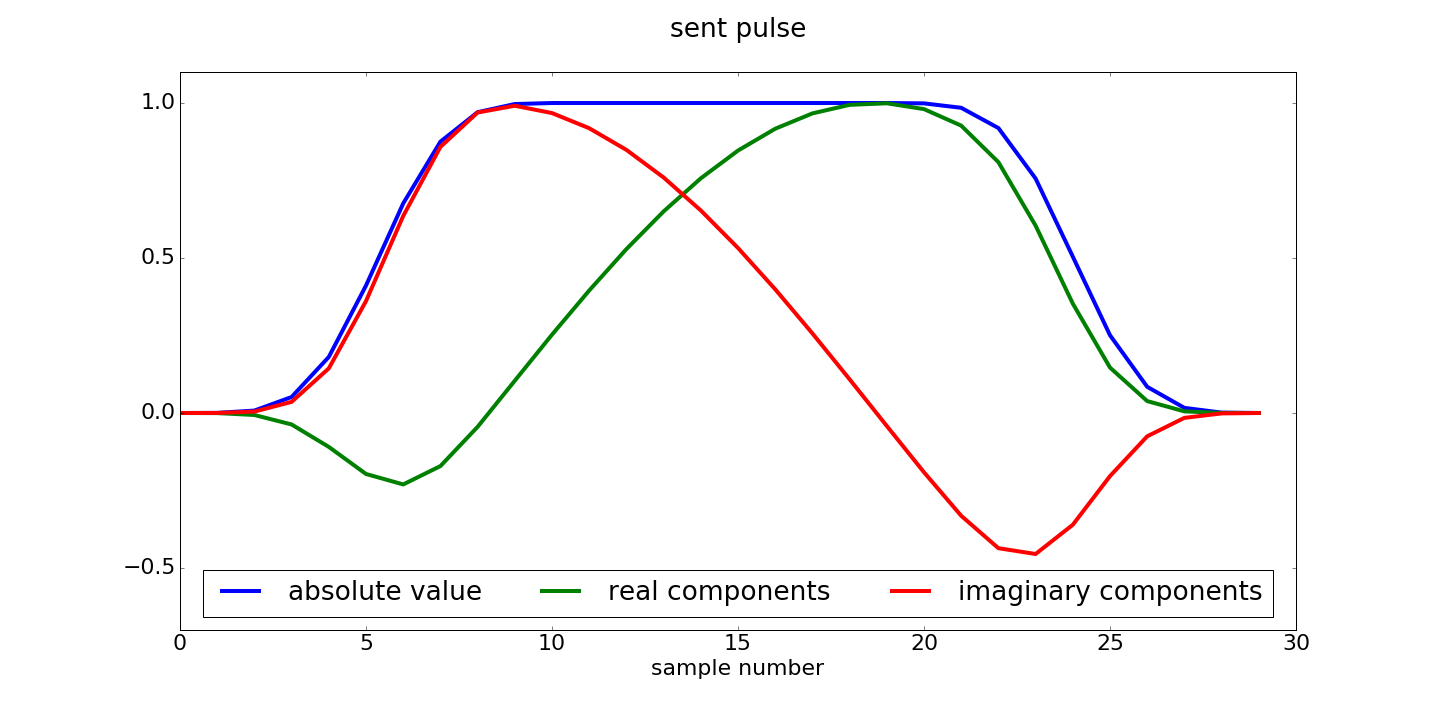

In [8]:
plt.title('sent pulse\n')
plt.plot(np.abs(p), lw=4)
plt.plot(np.real(p), lw=4)
plt.plot(np.imag(p), lw=4)
plt.legend(['absolute value', 'real components', 'imaginary components'], loc='lower center', ncol=3)
plt.ylim([-0.7, 1.1])
_ = plt.xlabel('sample number')

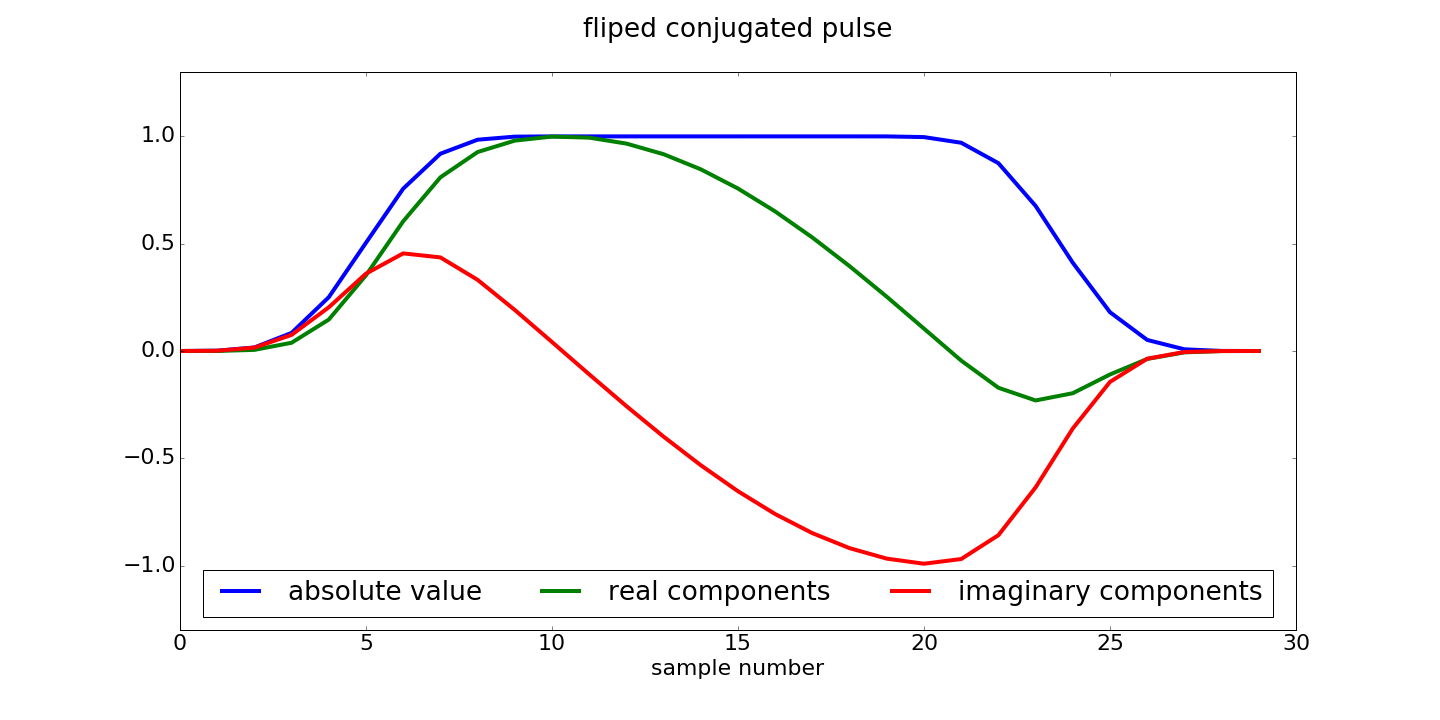

In [21]:
plt.title('fliped conjugated pulse\n')
plt.plot(np.abs(np.conjugate(p[::-1])), lw=4)
plt.plot(np.real(np.conjugate(p[::-1])), lw=4)
plt.plot(np.imag(np.conjugate(p[::-1])), lw=4)
plt.legend(['absolute value', 'real components', 'imaginary components'], loc='lower center', ncol=3)
plt.ylim([-1.3, 1.3])
_ = plt.xlabel('sample number')

### Single ping

log of absolute value of <br>

<li> complex signal 
<li> complex signal match filtered by (normalised) sent pulse

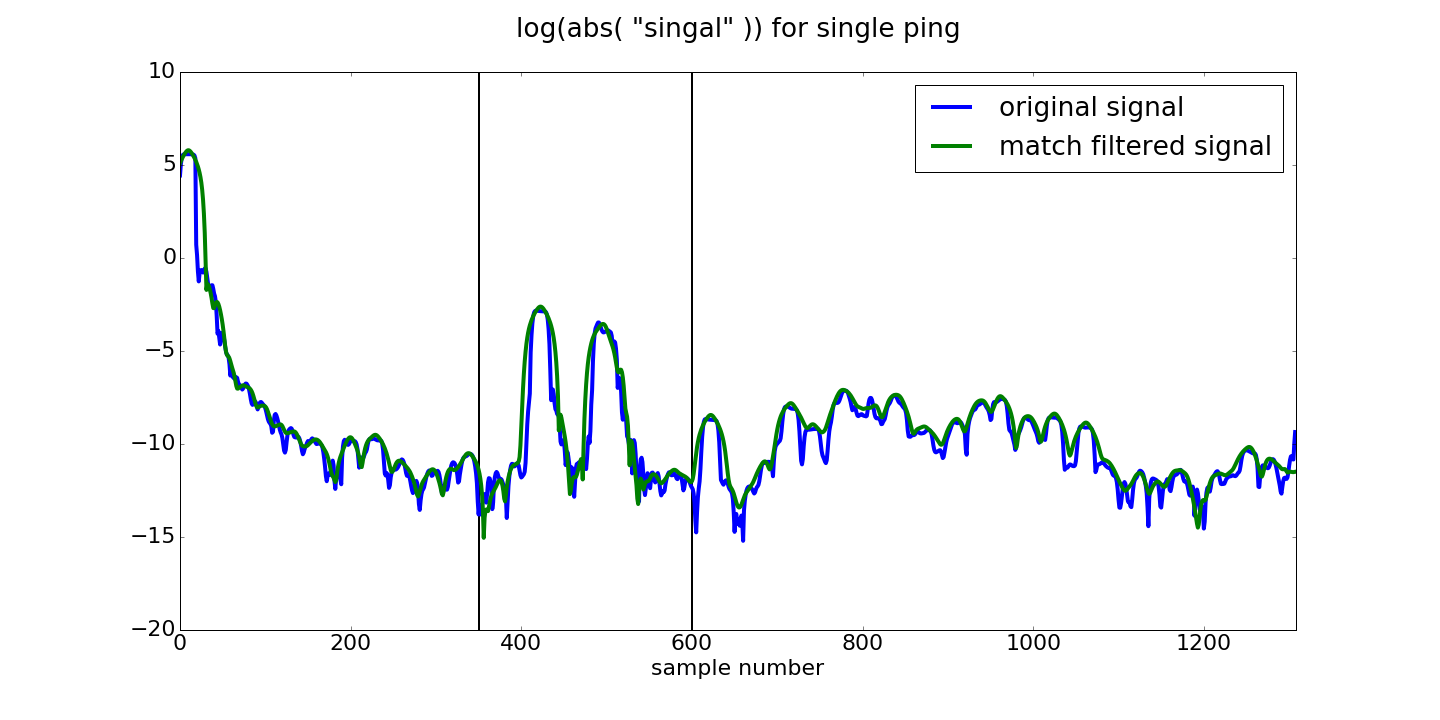

In [9]:
plt.title('log(abs( "singal" )) for single ping\n')
plt.plot(np.log(np.abs(s)), lw=4)
plt.plot(np.log(np.abs(np.convolve(np.conjugate(p[::-1]),s,'same')) / np.sqrt(np.abs(np.convolve(np.conjugate(p[::-1]),p,'same').sum()))), lw=4)
plt.xlim([0, len(s)])
plt.vlines([350, 600],color='k', ymin=-20, ymax=10, lw=2)
plt.legend(['original signal', 'match filtered signal'])
_ = plt.xlabel('sample number')

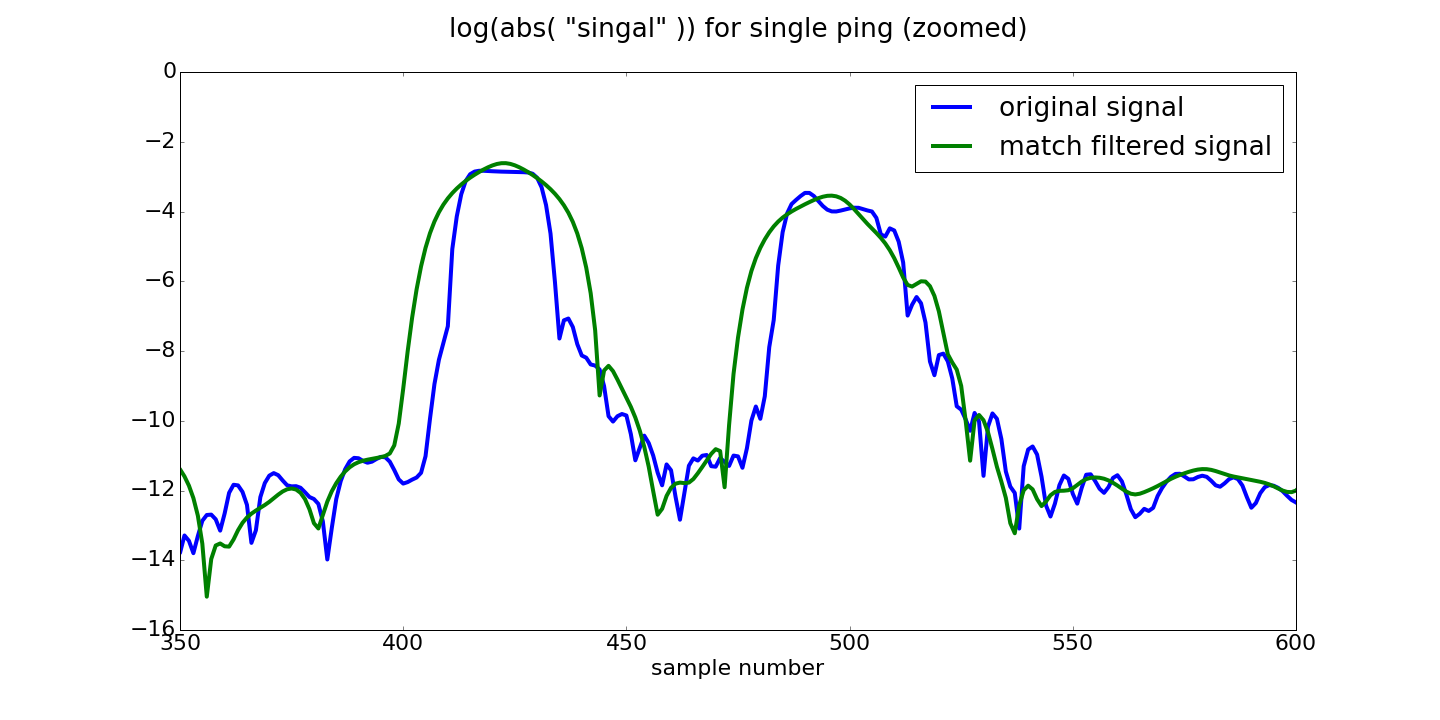

In [10]:
plt.title('log(abs( "singal" )) for single ping (zoomed)\n')
plt.plot(np.log(np.abs(s)), lw=4)
plt.plot(np.log(np.abs(np.convolve(np.conjugate(p[::-1]),s,'same')) / np.sqrt(np.abs(np.convolve(np.conjugate(p[::-1]),p,'same').sum()))), lw=4)
plt.legend(['original signal', 'match filtered signal'])
plt.ylim([-16, 0])
plt.xlabel('sample number')
_ = plt.xlim([350, 600])

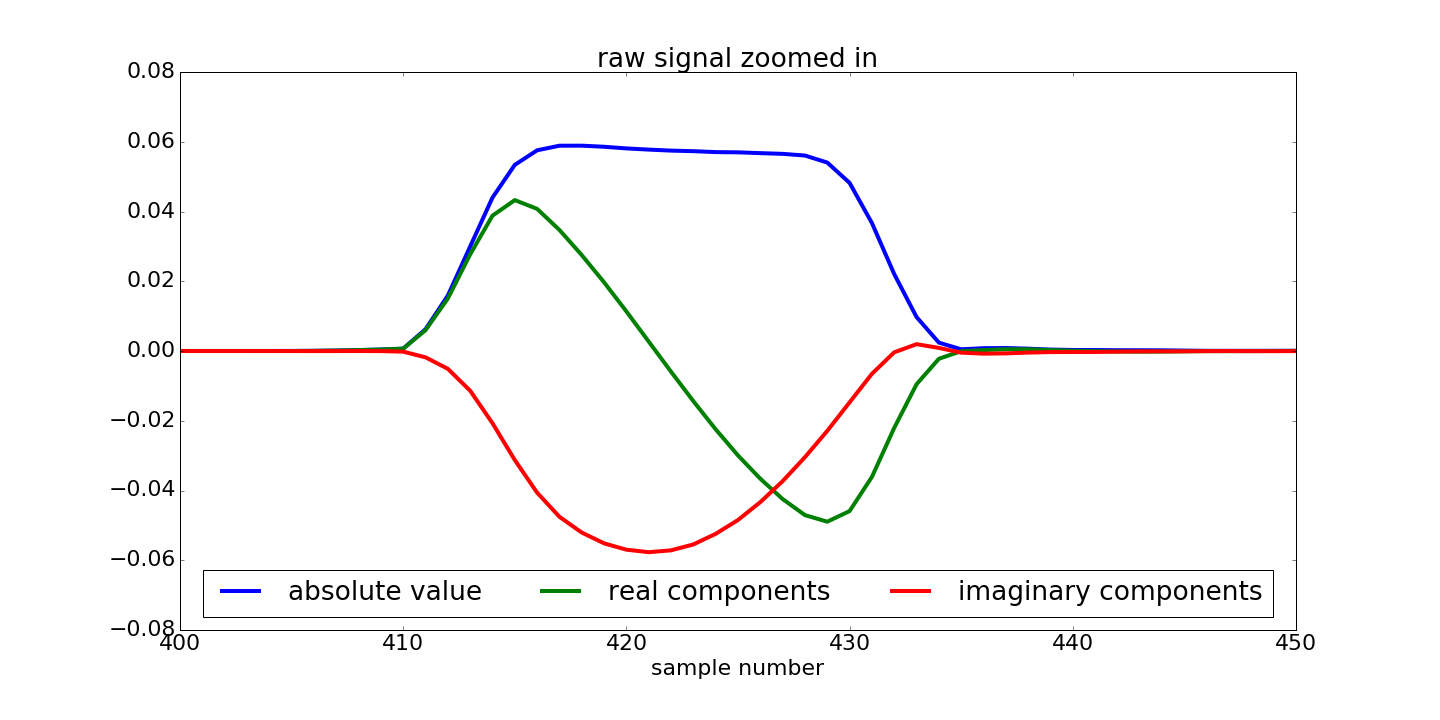

In [16]:
plt.title('raw signal zoomed in')
plt.plot(np.abs(s), lw=4)
plt.plot(np.real(s), lw=4)
plt.plot(np.imag(s), lw=4)
plt.legend(['absolute value', 'real components', 'imaginary components'], loc='lower center', ncol=3)
plt.xlabel('sample number')
plt.ylim([-0.08,0.08])
_ = plt.xlim([400, 450])

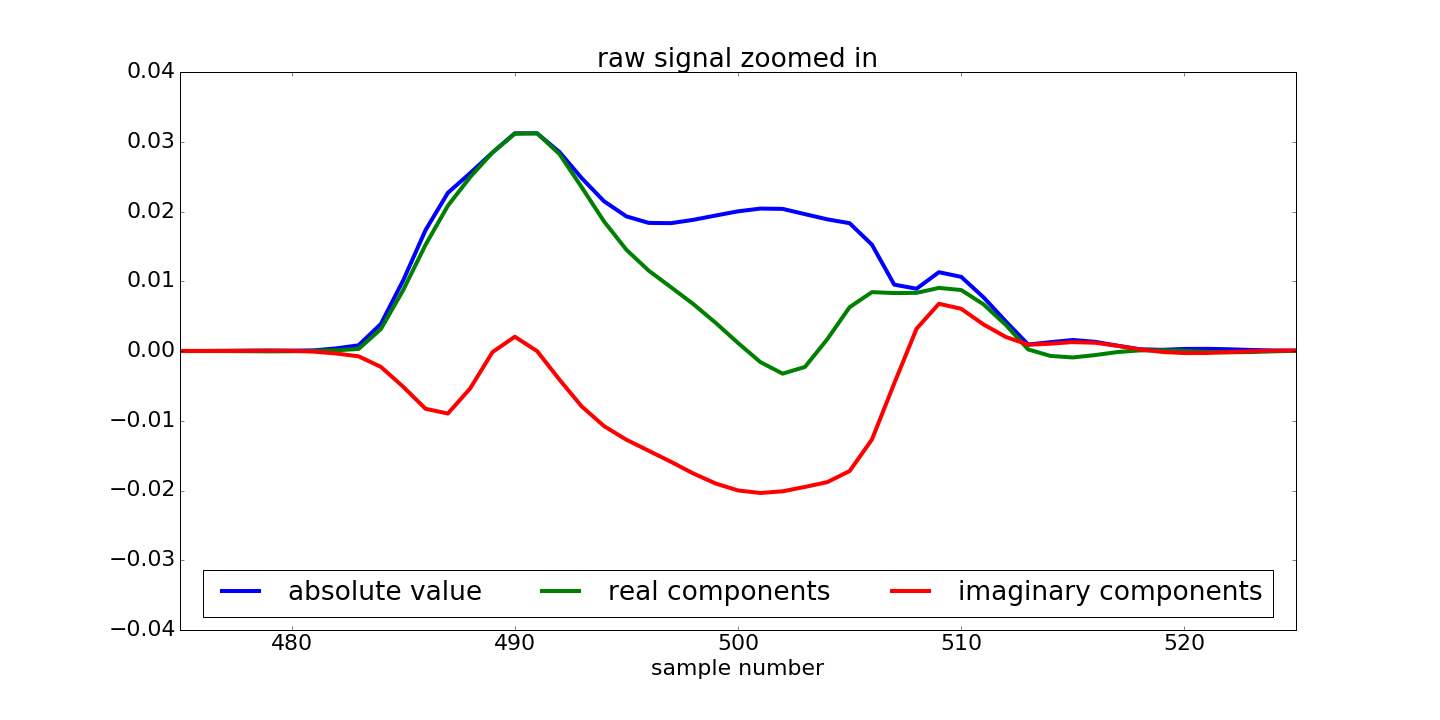

In [13]:
plt.title('raw signal zoomed in')
plt.plot(np.abs(s), lw=4)
plt.plot(np.real(s), lw=4)
plt.plot(np.imag(s), lw=4)
plt.legend(['absolute value', 'real components', 'imaginary components'], loc='lower center', ncol=3)
plt.xlabel('sample number')
plt.ylim([-0.04,0.04])
_ = plt.xlim([475, 525])

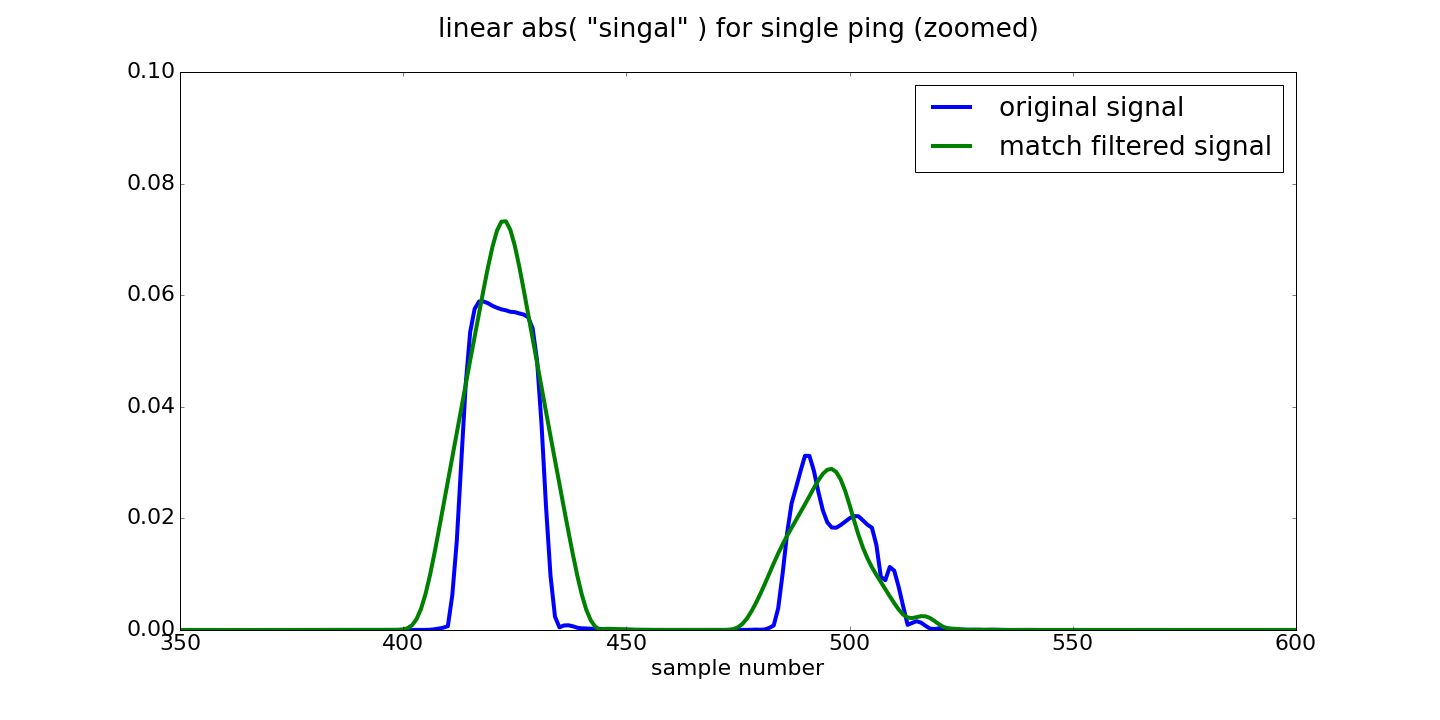

In [99]:
plt.title('linear abs( "singal" ) for single ping (zoomed)\n')
plt.plot(np.abs(s), lw=4)
plt.plot(np.abs(np.convolve(np.conjugate(p[::-1]),s,'same')) / np.sqrt(np.abs(np.convolve(np.conjugate(p[::-1]),p,'same').sum())), lw=4)
plt.xlim([350, 600])
plt.xlabel('sample number')
plt.legend(['original signal', 'match filtered signal'])
_ = plt.ylim([0,.1])